<span style="font-size:30px; font-weight:bold;">To what extent are changes in public and private school quality capitalized into local house prices, and how does this affect the net asset value of high-income households in California school districts from 2010–2018?</span>

<span style="font-size:24px; font-weight:bold;">Project 1</span>

<span style="font-size:20px; font-weight:bold;">1.1 Introduction</span>

This project compares the relationship between changes in public and private school quality measures and changes in house prices, focusing on how these measures are capitalized into housing markets across California school districts from 2010 to 2018. Specifically, it investigates how public investment in schools is reflected in house prices, particularly in districts with higher concentrations of high-income individuals (i.e., where the top income quintile holds a larger share of total district income), as a means of increasing their net asset value. While school quality often influences house prices, there is ongoing debate over the best proxies for school quality. Oates (1969) found expenditure per pupil significant, while Rosen and Fullerton (1977) and Downes and Zabel (2002) did not, instead emphasizing test scores. Gibbons and Machin (2003) found a higher proportion of students meeting educational targets significant, while Figlio and Lucas (2004) found letter grades for elementary schools insignificant. The challenge of separating school quality from neighborhood characteristics is central in these studies. Jud and Watts (1981) controlled for racial demographics and found reading scores had a positive effect; Black (1999) and Kane, Steiger, and Reigg (2005) found positive effects of test scores when controlling for boundary line fixed effects. Bayer, Ferreira, and McMillan (2007) built on Black's method by controlling for sociodemographics along borders, which reduced but did not eliminate the significance of school quality. Hayes and Taylor (1996) regarded value-added measures as theoretically sound, but Brasington (1999) found test scores to be more predictive. Brasington and Haurin (2006) found that both expenditure per pupil and test scores positively affect house prices, but value-added did not. This analysis focuses on student-to-teacher ratio, a measure less emphasized in prior research except for Brasington (1999), to determine if it and public school funding serve as effective proxies for school quality, particularly in high-income areas where such quality may be capitalized into house prices.

The data come from multiple sources: Kaggle U.S. Schools Dataset (Andrew, 2021), Kaggle U.S. Real Estate Dataset (Sakib, 2021), California Department of Education. (n.d.),  Population Reference Bureau. (n.d.), and the U.S. Census Bureau (n.d.). These datasets span all California school districts from 2010 to 2018, a period marked by economic recovery and shifting housing dynamics post-2008 financial crisis.

Findings show that the combined effect of changes in public school student-to-teacher ratios and changes in income concentration among the highest income quintile is one of the most significant predictors of house price changes at the district level. OLS regression, regression trees, and a random forest-derived importance matrix were used to support this conclusion. However, the analysis does not control for factors like school district policies, local tax rates, crime, or population changes. Further work including these controls would enhance accuracy. More detailed house price data could also improve year-over-year measurements of housing price change and the corresponding effect of each school quality indicator. The dependent variable is the change in house price from 2009 to 2018 (excluding 2009 since it has no prior year for comparison), and house price growth is used as a proxy for net asset value growth. All predictor variables are measured as annual changes at the district level.

**Explanation of Variables**

The dependent variable is the change in house price from 2009 to 2018 (excluding 2009 since it has no prior year for comparison), and house price growth is used as a proxy for net asset value growth. All predictor variables are measured as annual changes at the district level.

Changes in student-to-teacher ratio and enrollment rate serve as proxies for individualized attention and school demand, respectively. Lower ratios suggest smaller class sizes and better engagement; higher enrollment implies greater demand. Grade range reflects school specialization. A narrower grade range may indicate a focused curriculum, which can appeal to parents. The number of schools in a district can reflect school policy effectiveness and broader economic well-being, which in turn may attract long-term residents.

Current expense per ADA (Average Daily Attendance) measures the annual cost of education per public school student. An increase signals stronger local investment in school quality. Income inequality is measured by the share of total California school district income held by each quintile. A rising top-quintile share may improve school quality through increased funding via property taxes, potentially driving up house prices and benefiting wealthy households.

<span style="font-size:20px; font-weight:bold;">1.2 Data Cleaning/Loading</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

# Read public school funding datasets (2009-2010 to 2023-2024 school periods)
pubfund0910 = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/currentexpense0910.csv',
                          skiprows=8)
pubfund0910 = pubfund0910.iloc[:-1]

pubfund1011 = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/currentexpense1011.csv', 
                          skiprows=9)
pubfund1011 = pubfund1011.iloc[:-1]

pubfund1112 = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/currrentexpense1112.csv', 
                          skiprows=7)
pubfund1112 = pubfund1112.iloc[:-1]

pubfund1213 = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/currentexpense1213.csv', 
                          skiprows=6)
pubfund1213 = pubfund1213.iloc[:-1]

pubfund1314 = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/currentexpense1314.csv', 
                          skiprows=12)
pubfund1314 = pubfund1314.iloc[:-1]

pubfund1415 = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/currentexpense1415.csv', 
                          skiprows=9)
pubfund1415 = pubfund1415.iloc[:-3]

pubfund1516 = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/currentexpense1516.csv', 
                          skiprows=11)
pubfund1516 = pubfund1516.iloc[:-1]

pubfund1617 = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/currentexpense1617.csv', 
                          skiprows=8)

pubfund1718 = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/currentexpense1718.csv', 
                          skiprows=10)

pubfund1819 = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/currentexpense1819.csv', 
                          skiprows=10)

# Read Kaggle public school dataset
pub = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/Public_Schools.csv')

# Read Kaggle private school dataset
priv = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/Private_Schools.csv')

# Read public school dataset to match public school funding dataset to Kaggle public school dataset
pubschls = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/pubschls.csv', skiprows=5, 
                       low_memory=False)
pubschls = pubschls.iloc[:-1]

# Read gini coefficient dataset for household income distribution
hird = pd.read_csv(
    '/Users/capi/Documents/GitHub/eco225_final_project_code/gini_index_household_income_distribution.csv')

# Read real estate dataset
re = pd.read_csv('/Users/capi/Documents/GitHub/eco225_final_project_code/realtor-data.zip.csv')

In [2]:
# Clean Kaggle public and private school dataset

# Convert column names to lowercase
priv.columns = priv.columns.str.lower()
pub.columns = pub.columns.str.lower()

# Rename columns
priv = priv.rename(columns = {'sourcedate':'year', 'start_grad': 'start_grade', 'level_': 'level'})
pub = pub.rename(columns = {'sourcedate':'year', 'st_grade': 'start_grade', 'level_': 'level'})

# Drop rows with NaN values in subset of columns
priv = priv.dropna(subset = ['state', 'county', 'year', 'zip', 'latitude', 'longitude', 'enrollment', 
                      'ft_teacher', 'start_grade', 'end_grade', 'population', 'level'])
pub = pub.dropna(subset = ['state', 'county', 'year', 'zip', 'latitude', 'longitude', 'enrollment', 
                      'ft_teacher', 'start_grade', 'end_grade', 'population', 'level'])

# Format sourcedate column in school datasets to remove unwanted characters (00:00:00)
priv['year'] = pd.to_datetime(priv['year']).dt.year
pub['year'] = pd.to_datetime(pub['year']).dt.year

# Remove rows with null value in 'enrollment' and 'ft_teacher' columns
priv = priv[priv['enrollment'] > 0]
priv = priv[priv['ft_teacher'] > 0]
pub = pub[pub['enrollment'] > 0]
pub = pub[pub['ft_teacher'] > 0]


priv = priv[priv['year'].between(2009, 2018)]
pub = pub[pub['year'].between(2009, 2018)]

# Convert selected columns to numeric
priv['start_grade'] = pd.to_numeric(priv['start_grade'], errors='coerce').astype('Int64')
priv['end_grade'] = pd.to_numeric(priv['end_grade'], errors='coerce').astype('Int64')
pub['start_grade'] = pd.to_numeric(pub['start_grade'], errors='coerce').astype('Int64')
pub['end_grade'] = pd.to_numeric(pub['end_grade'], errors='coerce').astype('Int64')

# Map state abbreviations to full state name
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    
    # U.S. Territories
    'PR': 'Puerto Rico', 'VI': 'U.S. Virgin Islands', 'GU': 'Guam',
    'AS': 'American Samoa', 'MP': 'Northern Mariana Islands'
}

# Convert state abbreviations to full state names
priv['state'] = priv['state'].map(state_mapping)
pub['state'] = pub['state'].map(state_mapping)

pub = pub.drop(columns = ['x', 'y', 'objectid', 'ncesid', 'zip4', 'telephone', 'type', 'status', 'countyfips', 
                          'country', 'naics_code','naics_desc', 'source', 'val_method', 'val_date', 'website',
                          'districtid', 'shelter_id'])

priv = priv.drop(columns = ['x', 'y', 'fid', 'objectid', 'ncesid', 'zip4', 'telephone', 'type', 'status', 
                            'countyfips', 'country', 'naics_code','naics_desc', 'source', 'val_method', 'val_date', 
                            'website', 'shelter_id'])

# Filter for state of California
pub = pub[pub['state'] == 'California']
priv = priv[priv['state'] == 'California']

In [3]:
# Clean real estate dataset

# Match column names with school datasets
re = re.rename(columns = {'zip_code':'zip', 'prev_sold_date': 'year'})

# Drop rows with missing values from specific columns
re = re.dropna(subset = ['state', 'city', 'price', 'year', 'zip'])

# Drop rows with zero in 'price'
re = re[re['price'] > 0]

# Convert 'year' to string, then take first 4 characters (year part)
re['year'] = re['year'].astype(str).str[:4].astype(int)

# Format and filter 'year' for only years 2009 to 2018
re = re[re['year'].between(2009, 2018)]

# Convert 'zip' column to integer
re['zip'] = re['zip'].astype(int)

# Filter for state of California
re = re[re['state'] == 'California']

re = re.drop(columns = ['brokered_by', 'bed', 'bath', 'street', 'acre_lot', 'house_size', 'status'])

<span style="font-size:20px; font-weight:bold;">1.2.1 New Datasets Cleaning</span>

In [4]:
# Clean public school funding datasets (2009-2010 to 2023-2024 school periods)

# Rename columns and add 'Year' column
pubfund0910.columns = pubfund0910.columns.str.replace(r'\n', ' ').str.replace(r'\s+', ' ', regex=True).str.strip()
pubfund0910 = pubfund0910.rename(columns={'CO': 'county_code', 
                                          'LEA ID': 'cds',
                                          'DISTRICT': 'district', 
                                          'Expenditures (EDP 365)': 'expenditures', 
                                          'Current Expense ADA': 'current_expense_ada', 
                                          'Current Expense Per ADA': 'current_expense_per_ada', 
                                          'LEA Type': 'lea_type'})
pubfund0910['year'] = 2009
pubfund0910['current_expense_per_ada'] = pubfund0910['current_expense_per_ada'].str.replace(',', '').astype(float)

pubfund1011.columns = pubfund1011.columns.str.replace(r'\n', ' ').str.replace(r'\s+', ' ', regex=True).str.strip()
pubfund1011.columns = pubfund1011.columns.str.strip().str.replace('\n', ' ')
pubfund1011 = pubfund1011.rename(columns={'CO': 'county_code', 
                                          'LEA ID': 'cds', 
                                          'DISTRICT': 'district', 
                                          'Expenditures (EDP 365)': 'expenditures', 
                                          'Current Expense ADA': 'current_expense_ada', 
                                          'Current Expense Per ADA': 'current_expense_per_ada', 
                                          'LEA Type': 'lea_type'})
pubfund1011['year'] = 2010
pubfund1011['current_expense_per_ada'] = pubfund1011['current_expense_per_ada'].str.replace(',', '').astype(float)

pubfund1112.columns = pubfund1112.columns.str.strip().str.replace('\n', ' ')
pubfund1112 = pubfund1112.rename(columns={'CO': 'county_code', 
                                          'CDS': 'cds', 
                                          'DISTRICT': 'district', 
                                          'EDP 365': 'expenditures', 
                                          'Current Expense ADA': 'current_expense_ada',
                                          'Current Expense Per ADA': 'current_expense_per_ada', 
                                          'LEA Type': 'lea_type'})
pubfund1112['year'] = 2011
pubfund1112['current_expense_per_ada'] = pubfund1112['current_expense_per_ada'].str.replace(',', '').astype(float)

pubfund1213.columns = pubfund1213.columns.str.strip().str.replace('\n', ' ')
pubfund1213 = pubfund1213.rename(columns={'CO': 'county_code', 
                                          'CDS': 'cds', 
                                          'DISTRICT': 'district', 
                                          'Expenditures (EDP 365)': 'expenditures', 
                                          'Current Expense ADA': 'current_expense_ada', 
                                          'Current Expense Per ADA': 'current_expense_per_ada', 
                                          'LEA Type': 'lea_type'})
pubfund1213['year'] = 2012
pubfund1213['current_expense_per_ada'] = pubfund1213['current_expense_per_ada'].str.replace(',', '').astype(float)

pubfund1314.columns = pubfund1314.columns.str.strip().str.replace('\n', ' ')
pubfund1314 = pubfund1314.rename(columns={'CO': 'county_code', 
                                          'CDS': 'cds', 
                                          'DISTRICT': 'district', 
                                          'Expenditures (EDP 365)': 'expenditures', 
                                          'Current Expense ADA': 'current_expense_ada', 
                                          'Current Expense Per ADA': 'current_expense_per_ada', 
                                          'LEA Type': 'lea_type'})
pubfund1314['year'] = 2013
pubfund1314['current_expense_per_ada'] = pubfund1314['current_expense_per_ada'].str.replace(',', '').astype(float)

pubfund1415.columns = pubfund1415.columns.str.replace(r'\n', ' ').str.replace(r'\s+', ' ', regex=True).str.strip()
pubfund1415 = pubfund1415.rename(columns={'CO': 'county_code', 
                                          'CDS': 'cds', 
                                          'DISTRICT': 'district', 
                                          'Expenditures EDP 365': 'expenditures', 
                                          'Current Expense ADA': 'current_expense_ada', 
                                          'Current Expense Per ADA': 'current_expense_per_ada', 
                                          'LEA Type': 'lea_type'})
pubfund1415['year'] = 2014
pubfund1415['current_expense_per_ada'] = pubfund1415['current_expense_per_ada'].str.replace(',', '').astype(float)

pubfund1516.columns = pubfund1516.columns.str.replace(r'\n', ' ').str.replace(r'\s+', ' ', regex=True).str.strip()
pubfund1516 = pubfund1516.rename(columns={'CO': 'county_code', 
                                          'CDS': 'cds', 
                                          'DISTRICT': 'district', 
                                          'EDP 365': 'expenditures', 
                                          'Current Expense ADA': 'current_expense_ada', 
                                          'Current Expense Per ADA': 'current_expense_per_ada', 
                                          'LEA Type': 'lea_type'})
pubfund1516['year'] = 2015
pubfund1516['current_expense_per_ada'] = pubfund1516['current_expense_per_ada'].str.replace(',', '').astype(float)

pubfund1617 = pubfund1617.rename(columns={'CO': 'county_code', 
                                          'CDS': 'cds', 
                                          'DISTRICT': 'district', 
                                          'EDP 365': 'expenditures', 
                                          'Current Expense ADA': 'current_expense_ada',
                                          'Current Expense Per ADA': 'current_expense_per_ada', 
                                          'LEA Type': 'lea_type'})
pubfund1617['year'] = 2016
pubfund1617['current_expense_per_ada'] = pubfund1617['current_expense_per_ada'].str.replace(',', '').astype(float)

pubfund1718 = pubfund1718.rename(columns={'CO': 'county_code', 
                                          'CDS': 'cds', 
                                          'DISTRICT': 'district',
                                          'EDP 365': 'expenditures', 
                                          'Current Expense ADA': 'current_expense_ada',
                                          'Current Expense per ADA': 'current_expense_per_ada', 
                                          'LEA Type': 'lea_type'})
pubfund1718['year'] = 2017
pubfund1718['current_expense_per_ada'] = pubfund1718['current_expense_per_ada'].str.replace(',', '').astype(float)

pubfund1819.columns = pubfund1819.columns.str.replace(r'\n', ' ').str.replace(r'\s+', ' ', regex=True).str.strip()
pubfund1819 = pubfund1819.rename(columns={'CO Code': 'county_code', 
                                          'District Code': 'cds', 
                                          'District': 'district', 
                                          'EDP 365': 'expenditures', 
                                          'Current Expense ADA': 'current_expense_ada',
                                          'Current Expense Per ADA': 'current_expense_per_ada', 
                                          'LEA Type': 'lea_type'})
pubfund1819['year'] = 2018
pubfund1819['current_expense_per_ada'] = pubfund1819['current_expense_per_ada'].str.replace(',', '').astype(float)

pubfund = pd.concat([pubfund0910, pubfund1011, pubfund1112, pubfund1213, pubfund1314, pubfund1415, pubfund1415, 
                     pubfund1516, pubfund1617, pubfund1718, pubfund1819], axis = 0, ignore_index = True)

pubfund = pubfund.drop(columns = ['county_code', 'cds', 'expenditures', 'current_expense_ada', 'lea_type'])

In [5]:
# Clean pubschls dataset (public schools and districts) used to merge with private & public school datasets on zip 
# code level and merge with income distribution and funding datasets at school district level

pubschls.columns = pubschls.columns.str.lower()

# List of columns to check for 'No Data'
columns_to_check = ['district', 'school', 'zip']

# Remove rows where any of the columns in 'columns_to_check' contain 'No Data'
pubschls = (pubschls[~pubschls[columns_to_check].apply(lambda row: row.str.contains('No Data', na=False).any(), 
                                                      axis=1)])

# Drop rows where the 'zip' column contains NaN values
pubschls = pubschls.dropna(subset=['district', 'school', 'zip'])

# Remove hyphen and characters after it in zip column
pubschls['zip'] = pubschls['zip'].str.replace(r'-.*', '', regex=True)

pubschls['zip'] = pubschls['zip'].astype(int)

pubschls = pubschls.drop(columns = ['state', 'county', 'city', 'cdscode', 'ncesdist', 'ncesschool', 'statustype', 
                                    'street', 'streetabr', 'mailstreet', 'mailstrabr', 'mailcity', 'mailzip', 
                                    'mailstate', 'phone', 'ext', 'faxnumber', 'website', 'opendate', 'closeddate',
                                    'charter', 'charternum', 'fundingtype', 'doc', 'doctype', 'soc', 'soctype',
                                    'edopscode', 'edopsname', 'eilcode', 'eilname', 'gsoffered', 'gsserved',
                                    'virtual', 'magnet', 'yearroundyn', 'federaldfcdistrictid', 'admfname', 
                                    'admlname', 'lastupdate', 'multilingual'])

In [6]:
# Clean income distribution dataset

hird = hird.rename(columns = {'Location': 'district', 'ParentCounty': 'county', 'IncomeQuintile': 'quintile',
                              'TimeFrame': 'year', 'Data': 'inc_percent'})

# Take middle year of timeframe value (e.g. if year is 2006_2010 then take 2008 as year)
hird['year'] = (hird['year'].apply(lambda x: int(x.split('_')[0]) + (int(x.split('_')[1]) - int(x.split('_')[0])) 
                                                                                                           // 2))

# Remove rows where inc_percent contains 'N_A' or 'S'
hird = hird[~hird['inc_percent'].str.contains('N_A|S', na=False)]

# Remove rows where inc_percent is NaN
hird = hird.dropna(subset=['inc_percent'])

# Convert inc_percent column to float type
hird['inc_percent'] = hird['inc_percent'].astype(float)

hird = hird.drop(columns = ['FIPSCode', 'LocationType', 'DataFormat', 'county'])

In [7]:
# MERGING

pub_merged = pub.merge(pubschls[['district', 'zip']], on='zip', how='left')
priv_merged = priv.merge(pubschls[['district', 'zip']], on='zip', how='left')

# Calculate private and public school grade span
priv_merged['priv_gr_span'] = priv_merged['end_grade'] - priv_merged['start_grade']
pub_merged['pub_gr_span'] = pub_merged['end_grade'] - pub_merged['start_grade']

# Convert school data into district-level summary statistics
priv_district = priv_merged.groupby(['district', 'zip', 'year', 'level']).agg(
    priv_count=('district', 'count'),           # Number of private schools per district
    priv_enrollment=('enrollment', 'sum'),      # Total enrollment in private schools per district
    priv_teachers=('ft_teacher', 'sum'),        # Total full-time teachers in private schools per district
    priv_avg_gr_span=('priv_gr_span', 'mean'),  # Average grade span in private schools per district
    priv_population=('population', 'sum')       # Total student population in private schools per district
).reset_index()
priv_district['priv_st_ratio'] = priv_district['priv_enrollment'] / priv_district['priv_teachers']
priv_district['priv_er'] = priv_district['priv_enrollment'] / priv_district['priv_population']

pub_district = pub_merged.groupby(['district', 'zip', 'year']).agg(
    pub_count=('district', 'count'),
    pub_enrollment=('enrollment', 'sum'),
    pub_teachers=('ft_teacher', 'sum'),
    pub_avg_gr_span=('pub_gr_span', 'mean'),  
    pub_population=('population', 'sum')
).reset_index()
pub_district['pub_st_ratio'] = pub_district['pub_enrollment'] / pub_district['pub_teachers']
pub_district['pub_er'] = pub_district['pub_enrollment'] / pub_district['pub_population']

# Merge private and public school data on zip and year
school_district = priv_district.merge(pub_district, on=['district', 'zip', 'year'], how='outer')

# Merge school zip data into the real estate dataset on zip and year
school_re = re.merge(school_district, on=['zip', 'year'], how='inner')

# Clean school real estate dataset
school_re = school_re.dropna(subset=['year'])
school_re['year'] = school_re['year'].astype(int)

# Rename 'county' column in pub to avoid conflicts with re
pub_renamed = pub[['zip', 'county', 'year']].copy()  
pub_renamed = pub_renamed.rename(columns={'county': 'county_pub'})  

# Merge 're' with the renamed 'pub_renamed' dataset on 'ZIP'
school_re = school_re.merge(pub_renamed, on=['zip', 'year'], how='left')

# Now assign 'COUNTY_pub' to 'COUNTY' and drop 'COUNTY_pub'
school_re['county'] = school_re['county_pub']
school_re = school_re.drop(columns=['county_pub'])

school_re = school_re.sort_values(by=['district', 'county', 'year'])

merged_df = school_re

In [8]:
# Replace "No Data" with NaN in latitude and longitude columns
pubschls['latitude'] = pd.to_numeric(pubschls['latitude'], errors='coerce')
pubschls['longitude'] = pd.to_numeric(pubschls['longitude'], errors='coerce')

# Group by district and aggregate
pubschls_grouped = pubschls.groupby('district').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'zip': 'first'  # Taking the first zip code for each district
}).reset_index()

# Merge the grouped pubschls data with merged_df
merged_df = merged_df.merge(pubschls_grouped[['district', 'zip', 'latitude', 'longitude']], on=['district', 'zip'],
                            how='left')

In [9]:
import warnings

columns_to_check = ['priv_st_ratio', 'priv_er', 'priv_avg_gr_span', 'priv_count', 
                    'pub_st_ratio', 'pub_er', 'pub_avg_gr_span', 'pub_count']

# Suppress RuntimeWarnings related to empty slices when calculating medians
warnings.filterwarnings("ignore", category=RuntimeWarning, message="Mean of empty slice")

# Impute missing values by district-year median
df_imputed_district_year = merged_df.copy()

# Group by district and year to calculate the median for each group
for col in columns_to_check:
    df_imputed_district_year[col] = df_imputed_district_year.groupby(['district', 'year'])[col] \
        .transform(lambda x: x.fillna(x.median()) if len(x) > 0 else x)

In [10]:
# Impute missing values by district median
df_imputed_district = df_imputed_district_year.copy()

# For each column, fill missing values by the district median
for col in columns_to_check:
    df_imputed_district[col] = df_imputed_district[col].fillna(df_imputed_district.groupby('district')[col]. \
                                                               transform('median'))

In [11]:
# Impute missing values by county median
df_imputed_county = df_imputed_district.copy()

# For each column, fill missing values by the county median
for col in columns_to_check:
    df_imputed_county[col] = df_imputed_county[col].fillna(df_imputed_county.groupby('county')[col]. \
                                                           transform('median'))

In [12]:
merged_df = df_imputed_county

merged_df = merged_df.dropna(subset = ['priv_st_ratio', 'priv_er', 'priv_avg_gr_span', 'priv_count', 
                                       'pub_st_ratio', 'pub_er', 'pub_avg_gr_span', 'pub_count'])

merged_df = merged_df.sort_values(by=['district', 'year'])

In [13]:
# Merge merged_df with pubfund_df on both 'district' and 'year'
merged_df = merged_df.merge(pubfund, on=['district', 'year'], how='left')

merged_df = merged_df.merge(hird, on=['district', 'year'], how='left')

# Filter for the desired quintiles: middle, fourth, and highest
quintiles_of_interest = ['Middle Quintile', 'Fourth Quintile', 'Highest Quintile']
merged_df = merged_df[merged_df['quintile'].isin(quintiles_of_interest)]

merged_df = merged_df.sort_values(by=['district', 'year'])

merged_df = merged_df.drop(columns = ['city', 'state', 'county', 'priv_enrollment', 'priv_teachers', 
                                      'priv_population', 'pub_enrollment', 'pub_teachers', 'pub_population'])

In [14]:
x_vars_per_district_year = merged_df.groupby(['district', 'year']).agg({
    'priv_st_ratio': 'mean',
    'pub_st_ratio': 'mean',
    'priv_er': 'mean',
    'pub_er': 'mean',
    'priv_avg_gr_span': 'mean',
    'pub_avg_gr_span': 'mean',
    'priv_count': 'sum',
    'pub_count': 'sum',
    'current_expense_per_ada': 'mean',
    'inc_percent': 'mean'
}).reset_index()

x_vars_per_district_year = x_vars_per_district_year.sort_values(by=['district', 'year'])

# Compute change for variables in rates and ratio, compute percentage change for variables measured in levels
x_vars_per_district_year['priv_st_ratio_change'] = (
    x_vars_per_district_year.groupby('district')['priv_st_ratio'].diff())
x_vars_per_district_year['pub_st_ratio_change'] = (
    x_vars_per_district_year.groupby('district')['pub_st_ratio'].diff())
x_vars_per_district_year['priv_er_change'] = x_vars_per_district_year.groupby('district')['priv_er'].diff()
x_vars_per_district_year['pub_er_change'] = x_vars_per_district_year.groupby('district')['pub_er'].diff()
x_vars_per_district_year['priv_avg_gr_%change'] = (
    x_vars_per_district_year.groupby('district')['priv_avg_gr_span'].pct_change() * 100)
x_vars_per_district_year['pub_avg_gr_%change'] = (
    x_vars_per_district_year.groupby('district')['pub_avg_gr_span'].pct_change() * 100)
x_vars_per_district_year['priv_count_%change'] = (
    x_vars_per_district_year.groupby('district')['priv_count'].pct_change() * 100)
x_vars_per_district_year['pub_count_%change'] = (
    x_vars_per_district_year.groupby('district')['pub_count'].pct_change() * 100)
x_vars_per_district_year['current_expense_per_ada_%change'] = (
    x_vars_per_district_year.groupby('district')['current_expense_per_ada'].pct_change() * 100)
x_vars_per_district_year['inc_percent_change'] = (
    x_vars_per_district_year.groupby('district')['inc_percent'].diff())

# Keep only change columns + district/year
x_change_cols = ['priv_st_ratio_change', 'pub_st_ratio_change',
                 'priv_er_change', 'pub_er_change',
                 'priv_avg_gr_%change', 'pub_avg_gr_%change',
                 'priv_count_%change', 'pub_count_%change',
                 'current_expense_per_ada_%change', 'inc_percent_change']

x_change_df = x_vars_per_district_year[['district', 'year'] + x_change_cols]

# Merge into main dataset
merged_df = pd.merge(
    merged_df,
    x_change_df,
    on=['district', 'year'],
    how='left'
)

In [15]:
# Sort before calculating changes
merged_df = merged_df.sort_values(by=['district', 'year'])

# Calculate the change in price 
avg_per_district_year = merged_df.groupby(['district', 'year'])['price'].mean().reset_index()
avg_per_district_year = avg_per_district_year.rename(columns={'price': 'avg_price'})

avg_per_district_year['price_%change'] = (avg_per_district_year.groupby('district')['avg_price'].
                                              pct_change() * 100)  # percentage change

# Compute log of avg_price
avg_per_district_year['log_price'] = np.log(avg_per_district_year['avg_price'])

# Calculate year-over-year change in log price
avg_per_district_year['log_price_%change'] = (avg_per_district_year.groupby('district')['log_price'].
                                                   diff())

# Merge avg_price growth info into merged_df
merged_df = pd.merge(
    merged_df,
    avg_per_district_year[['district', 'year', 'avg_price', 'price_%change', 'log_price', 'log_price_%change']],
    on=['district', 'year'],
    how='left')

merged_df = merged_df[merged_df['year'] != 2009]

<span style="font-size:20px; font-weight:bold;">1.3 Summary Statistics Tables</span>

In [84]:
# SUMMARY TABLE

highest_qu_merged_df = merged_df[merged_df['quintile'] == 'Highest Quintile']

summary_table_columns = ['priv_st_ratio_change', 'pub_st_ratio_change',
                 'priv_er_change', 'pub_er_change',
                 'current_expense_per_ada_%change', 'inc_percent_change', 'price_%change']

summary_table = highest_qu_merged_df[summary_table_columns].describe()

summary_table_rounded = summary_table.round(2)

summary_table_rounded.to_csv("summary_table.csv", index=False)

summary_table_rounded

,priv_st_ratio_change,pub_st_ratio_change,priv_er_change,pub_er_change,current_expense_per_ada_%change,inc_percent_change,price_%change
count,19667.00,19667.00,19667.00,19667.00,18263.00,19667.00,19667.00
mean,-1.21,-0.16,-0.02,-0.00,7.23,0.07,7.46
std,6.58,6.60,0.08,0.02,11.51,0.39,91.33
min,-36.50,-119.56,-0.66,-0.46,-26.15,-0.80,-94.01
25%,-5.47,-1.85,-0.05,-0.00,-1.31,-0.03,-23.64
50%,-0.79,-0.03,-0.01,-0.00,3.26,0.03,-3.64
75%,1.31,1.11,0.01,0.00,15.02,0.13,15.21
max,90.86,122.17,0.52,0.46,65.91,12.27,1579.57


Public school student-to-teacher ratio changes typically range from one to two students more or less per teacher; private schools range from five fewer to two more students per teacher. Most public schools showed little change in enrollment, while private schools experienced an average 0.02 percentage point decrease, possibly due to stricter admission or dissatisfaction with private schooling. On average, public school districts increased per-student spending by 7.23% annually, with half spending 3.26% or less, indicating a right-skewed distribution. The top income quintile in California school districts saw their share of household income grow by 0.07 percentage points annually, reflecting rising inequality. House price changes averaged 7.46% annually, with a wide variation of 91.33%. However, half the districts saw declines of 3.64% or more. This highlights both rising average house prices and large inter-district variation, likely driven by unmeasured factors such as crime, employment, and local policies. The granularity of school districts and inconsistent data coverage over time may explain unusually high or low year-over-year price changes.

In [18]:
# CURRENT EXPENSE PER ADA QUINTILE SUB-GROUP SUMMARY TABLE

# Assign quintiles based on current_expense_per_ada
merged_df['expense_quintile'] = pd.qcut(
    merged_df['current_expense_per_ada_%change'], 3, 
    labels=["Middle Quintile", "Fourth Quintile", "Highest Quintile"]
)

# Check quintile distribution (optional)
expense_quintile_distribution = merged_df['expense_quintile'].value_counts()

# Compute summary statistics
summary_by_expense_quintile = merged_df.groupby('expense_quintile')[summary_columns].describe()

# Reshape for readability: variable & statistic as rows, quintiles as columns
summary_transposed_by_expense = (
    summary_by_expense_quintile.transpose()
    .stack(level=0)
    .unstack(level=1)
)

# Rename the index for clarity
summary_transposed_by_expense.index = summary_transposed_by_expense.index.set_names(['Variable', 'Statistic'])

# Force all values to display with 2 decimal places as strings
summary_transposed_by_expense = summary_transposed_by_expense.applymap(lambda x: f"{x:.2f}")

summary_transposed_by_expense

count   mean     std  \
Variable                        Statistic                                   
priv_st_ratio_change            Middle Quintile   18495.00  -1.03    7.37   
                                Fourth Quintile   18122.00  -0.78    5.96   
                                Highest Quintile  18276.00  -1.61    6.40   
pub_st_ratio_change             Middle Quintile   18495.00  -0.53    5.96   
                                Fourth Quintile   18122.00  -0.28    7.63   
                                Highest Quintile  18276.00   0.40    6.29   
priv_er_change                  Middle Quintile   18495.00  -0.02    0.06   
                                Fourth Quintile   18122.00  -0.02    0.08   
                                Highest Quintile  18276.00  -0.02    0.11   
pub_er_change                   Middle Quintile   18495.00  -0.00    0.01   
                                Fourth Quintile   18122.00  -0.00    0.02   
                                Highest Quintile  18276.00   0.00    0.03   
current_expense_per_ada_%change Middle Quintile   18495.00  -3.41    2.91   
                                Fourth Quintile   18122.00   4.45    3.27   
                                Highest Quintile  18276.00  20.83    8.63   
inc_percent_change              Middle Quintile   18495.00   0.08    0.37   
                                Fourth Quintile   18122.00   0.02    0.46   
                                Highest Quintile  18276.00   0.06    0.62   
price_%change                   Middle Quintile   18495.00   2.01   49.01   
                                Fourth Quintile   18122.00   7.49   57.68   
                                Highest Quintile  18276.00  14.10  143.31   

                                                      min     25%    50%  \
Variable                        Statistic                                  
priv_st_ratio_change            Middle Quintile    -23.72   -5.80  -1.62   
                                Fourth Quintile    -21.00   -5.01  -0.11   
                                Highest Quintile   -36.50   -4.97  -0.87   
pub_st_ratio_change             Middle Quintile   -119.56   -1.60  -0.50   
                                Fourth Quintile   -119.56   -1.52  -0.06   
                                Highest Quintile   -22.11   -1.85   0.00   
priv_er_change                  Middle Quintile     -0.43   -0.04  -0.01   
                                Fourth Quintile     -0.58   -0.05  -0.00   
                                Highest Quintile    -0.66   -0.06   0.00   
pub_er_change                   Middle Quintile     -0.12   -0.00  -0.00   
                                Fourth Quintile     -0.46   -0.00  -0.00   
                                Highest Quintile    -0.26   -0.00   0.00   
current_expense_per_ada_%change Middle Quintile    -26.15   -4.96  -2.91   
                                Fourth Quintile      0.32    1.72   3.30   
                                Highest Quintile    11.64   15.02  18.42   
inc_percent_change              Middle Quintile     -0.40   -0.00   0.03   
                                Fourth Quintile    -10.83   -0.03   0.03   
                                Highest Quintile   -13.02   -0.03   0.03   
price_%change                   Middle Quintile    -83.02  -19.62  -6.05   
                                Fourth Quintile    -85.83  -20.35   1.05   
                                Highest Quintile   -94.01  -32.68  -6.59   

                                                    75%      max  
Variable                        Statistic                         
priv_st_ratio_change            Middle Quintile    1.12    90.53  
                                Fourth Quintile    2.09    21.00  
                                Highest Quintile   1.17    90.86  
pub_st_ratio_change             Middle Quintile    0.76   122.17  
                                Fourth Quintile    1.42   121.41  
                                Highest Quintile   1.73    33.1

The highest public funding quintile districts had the largest average increase in house prices of about 14.10%, the highest public education spending change at 20.83%, and a slight average 0.40 increase in public student-teacher ratios, while the private student-teacher ratio change was most negative at -1.61, possibly reflecting students switching from private to public school systems or enrollment shifts. Compared to middle and fourth quintiles, these figures suggest that wealthier districts experienced greater investment and volatility, potentially indicating that school-related changes were more strongly capitalized into local house prices.

<span style="font-size:20px; font-weight:bold;">1.4 Plots, Histograms, Figures</span>

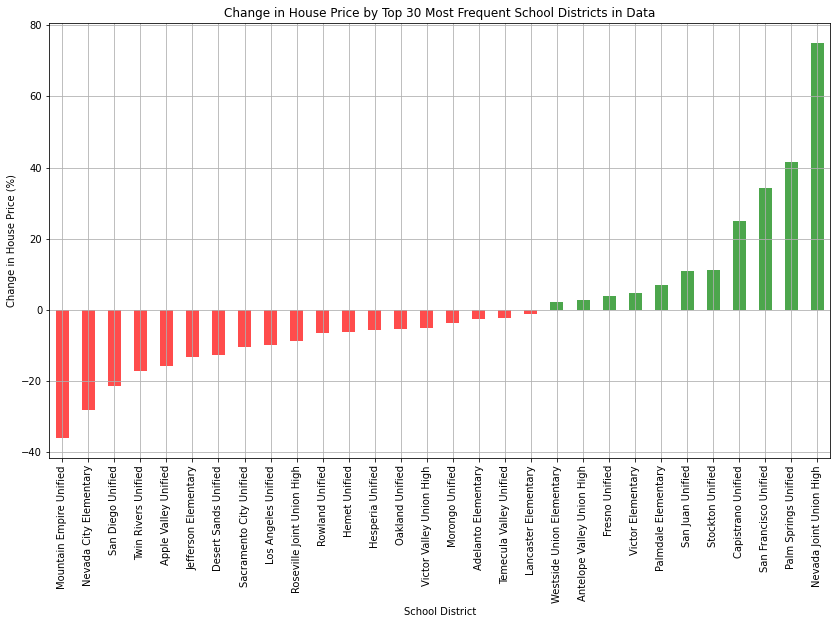

In [75]:
# BAR CHART OF HOUSE PRICE GROWTH FOR MOST FREQUENT SCHOOL DISTRICTS

# Get the top 30 most frequent districts based on the number of rows in the data
top_30_districts = merged_df['district'].value_counts().head(30).index

# Filter the data to include only the top 30 most frequent districts
top_30_district_data = merged_df[merged_df['district'].isin(top_30_districts)]

# Calculate the average price growth by district for the top 30 districts
avg_price_growth_by_top_30_district = top_30_district_data.groupby('district')['price_%change'].mean()

# Order the districts in ascending order of price growth
avg_price_growth_by_top_30_district = avg_price_growth_by_top_30_district.sort_values(ascending=True)

# Create a color map where negative price growth bars are red and positive ones are green
colors = ['red' if value < 0 else 'green' for value in avg_price_growth_by_top_30_district]

# Plot the bar chart with custom colors
plt.figure(figsize=(14, 8))
avg_price_growth_by_top_30_district.plot(kind='bar', color=colors, alpha=0.7)
plt.title('Change in House Price by Top 30 Most Frequent School Districts in Data')
plt.xlabel('School District')
plt.ylabel('Change in House Price (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig("bar_plot.png", dpi=300, bbox_inches='tight')
plt.show()

Among the 30 school districts with the most complete house price data, a trend from steep average price declines (~35%) to near-zero change was observed, with 19 experiencing declines and 11 showing positive growth. The latter group saw an initial slow rise followed by a sharper increase around 10%, suggesting most districts hover within 10% of flat growth, while a few exhibit extreme positive or negative shifts. These extremes may be due to data limitations or timing — some districts only have early data affected by the 2008 recession, while others only have post-2015 data when prices recovered. This sample provides a snapshot, but all school districts are used in the broader analysis to maximize data coverage.

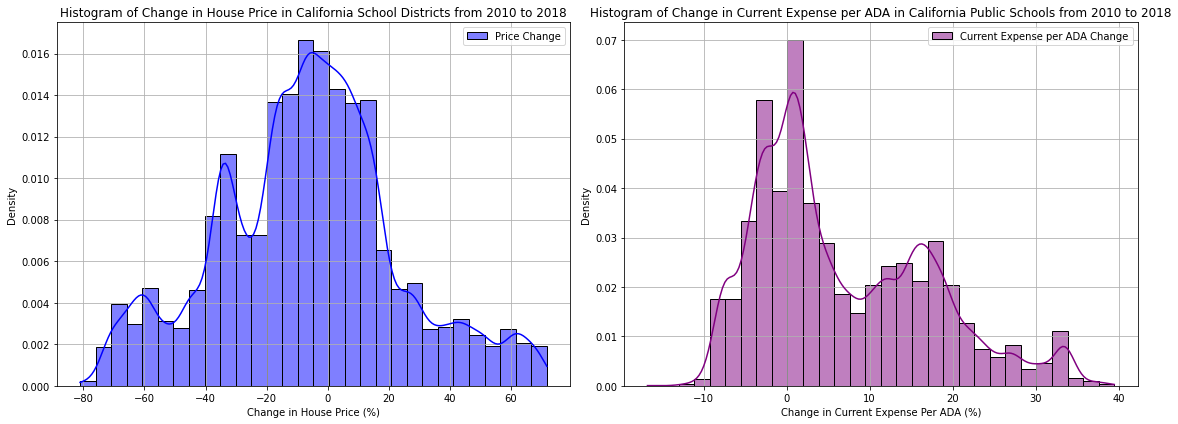

In [72]:
# HISTOGRAM OF HOUSE PRICE GROWTH (Y-VARIABLE) & PUBLIC SCHOOL FUNDING

# Price Growth
Q1_price_growth = merged_df['price_%change'].quantile(0.25)
Q3_price_growth = merged_df['price_%change'].quantile(0.75)
IQR_price_growth = Q3_price_growth - Q1_price_growth
lower_bound_price_growth = Q1_price_growth - 1.5 * IQR_price_growth
upper_bound_price_growth = Q3_price_growth + 1.5 * IQR_price_growth

# Filter out the outliers for 'price_growth'
filtered_price_growth = merged_df[(merged_df['price_%change'] >= lower_bound_price_growth) & 
                                  (merged_df['price_%change'] <= upper_bound_price_growth)]

# Current Expense per ADA
Q1_expense = merged_df['current_expense_per_ada_%change'].quantile(0.25)
Q3_expense = merged_df['current_expense_per_ada_%change'].quantile(0.75)
IQR_expense = Q3_expense - Q1_expense
lower_bound_expense = Q1_expense - 1.5 * IQR_expense
upper_bound_expense = Q3_expense + 1.5 * IQR_expense

# Filter out the outliers for 'current_expense_per_ada'
filtered_expense = merged_df[(merged_df['current_expense_per_ada_%change'] >= lower_bound_expense) & 
                             (merged_df['current_expense_per_ada_%change'] <= upper_bound_expense)]

# Create the side-by-side histogram plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 'price_growth' histogram with density plot
sns.histplot(filtered_price_growth['price_%change'], 
             kde=True, color='blue', label='Price Change', stat='density', bins=30, ax=axes[0])
axes[0].set_title('Histogram of Change in House Price in California School Districts from 2010 to 2018')
axes[0].set_xlabel('Change in House Price (%)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# Plot scaled 'current_expense_per_ada' histogram with density plot
sns.histplot(filtered_expense['current_expense_per_ada_%change'] , kde=True, color='purple', 
             label='Current Expense per ADA Change', stat='density', bins=30, ax=axes[1])
axes[1].set_title('Histogram of Change in Current Expense per ADA in California Public Schools from 2010 to 2018')
axes[1].set_xlabel('Change in Current Expense Per ADA (%)')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True)

# Display the plots
plt.tight_layout()
plt.savefig("histogram_plot.png", dpi=300, bbox_inches='tight')
plt.show()

The bar chart trend is confirmed in the histogram of house price change, which shows a bell-shaped distribution with most districts clustered around zero change, and fewer districts at the extremes. The distribution of current expense per ADA is right-skewed, indicating most districts spend less than the average increase, reinforcing insights from the summary statistics.

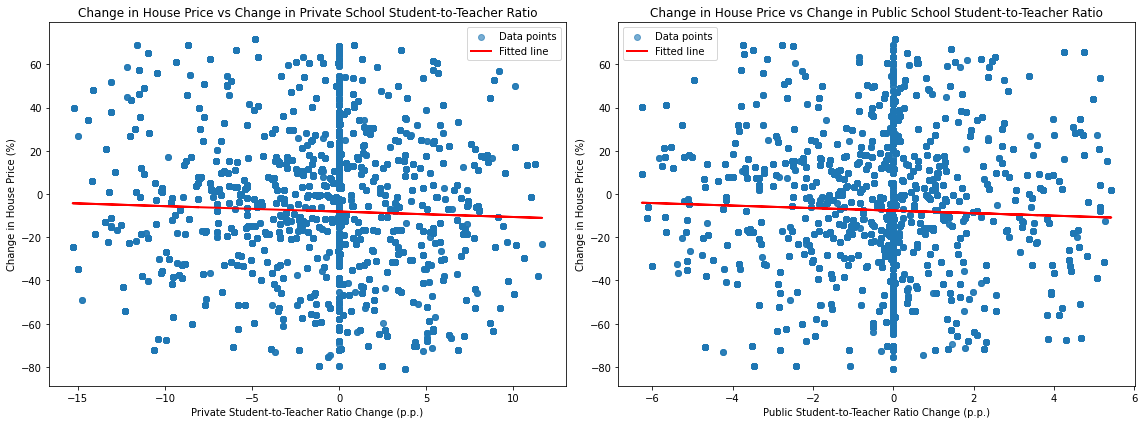

In [21]:
# SCATTER PLOT OF STUDENT-TO-TEACHER RATIO ON HOUSE PRICE GROWTH

from sklearn.linear_model import LinearRegression

#Drop rows with NaN values in both 'current_expense_per_ada' and 'price_growth'
clean_data = merged_df.dropna(subset=['current_expense_per_ada', 'price_%change'])

# Calculate the IQR for 'priv_st_ratio' and 'pub_st_ratio' to remove outliers
Q1_priv = clean_data['priv_st_ratio_change'].quantile(0.25)
Q3_priv = clean_data['priv_st_ratio_change'].quantile(0.75)
IQR_priv = Q3_priv - Q1_priv
lower_bound_priv = Q1_priv - 1.5 * IQR_priv
upper_bound_priv = Q3_priv + 1.5 * IQR_priv

Q1_pub = clean_data['pub_st_ratio_change'].quantile(0.25)
Q3_pub = clean_data['pub_st_ratio_change'].quantile(0.75)
IQR_pub = Q3_pub - Q1_pub
lower_bound_pub = Q1_pub - 1.5 * IQR_pub
upper_bound_pub = Q3_pub + 1.5 * IQR_pub

Q1_price_growth = clean_data['price_%change'].quantile(0.25)
Q3_price_growth = clean_data['price_%change'].quantile(0.75)
IQR_price_growth = Q3_price_growth - Q1_price_growth
lower_bound_price_growth = Q1_price_growth - 1.5 * IQR_price_growth
upper_bound_price_growth = Q3_price_growth + 1.5 * IQR_price_growth


# Filter out the outliers
filtered_data = clean_data[(clean_data['priv_st_ratio_change'] >= lower_bound_priv) & 
                           (clean_data['priv_st_ratio_change'] <= upper_bound_priv) & 
                           (clean_data['pub_st_ratio_change'] >= lower_bound_pub) & 
                           (clean_data['pub_st_ratio_change'] <= upper_bound_pub) &
                           (clean_data['price_%change'] >= lower_bound_price_growth) &
                           (clean_data['price_%change'] <= upper_bound_price_growth)]

# data for 'priv_st_ratio'
X_priv_filtered = filtered_data[['priv_st_ratio_change']]
y_priv_filtered = filtered_data['price_%change']
model = LinearRegression()
model.fit(X_priv_filtered, y_priv_filtered)
y_pred_priv_filtered = model.predict(X_priv_filtered)

# data for 'pub_st_ratio'
X_pub_filtered = filtered_data[['pub_st_ratio_change']]
y_pub_filtered = filtered_data['price_%change']
model.fit(X_pub_filtered, y_pub_filtered)
y_pred_pub_filtered = model.predict(X_pub_filtered)

# Scatter plot and linear regression for 'priv_st_ratio' vs 'price_growth' and 'pub_st_ratio' vs 'price_growth' 
# with outliers removed
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # two subplots side by side

# 'priv_st_ratio' plot
axes[0].scatter(filtered_data['priv_st_ratio_change'], filtered_data['price_%change'], alpha=0.6, 
                label='Data points')
axes[0].plot(X_priv_filtered, y_pred_priv_filtered, color='red', linewidth=2, label='Fitted line')
axes[0].set_title('Change in House Price vs Change in Private School Student-to-Teacher Ratio')
axes[0].set_xlabel('Private Student-to-Teacher Ratio Change (p.p.)')
axes[0].set_ylabel('Change in House Price (%)')
axes[0].legend()

# 'pub_st_ratio' plot
axes[1].scatter(filtered_data['pub_st_ratio_change'], filtered_data['price_%change'], alpha=0.6, 
                label='Data points')
axes[1].plot(X_pub_filtered, y_pred_pub_filtered, color='red', linewidth=2, label='Fitted line')
axes[1].set_title('Change in House Price vs Change in Public School Student-to-Teacher Ratio')
axes[1].set_xlabel('Public Student-to-Teacher Ratio Change (p.p.)')
axes[1].set_ylabel('Change in House Price (%)')
axes[1].legend()

plt.tight_layout()
plt.show()

Scatter plots show a slightly negative relationship between private school student-to-teacher ratio and house price change, where districts with increasing private school class sizes tend to see price declines. This may suggest that higher ratios are perceived as lower quality, which could depress local housing values, thereby lowering net asset values for high-income homeowners. A similar pattern may exist for public schools, where more students per teacher also corresponds to house price declines. These patterns require formal regression to assess statistical significance.

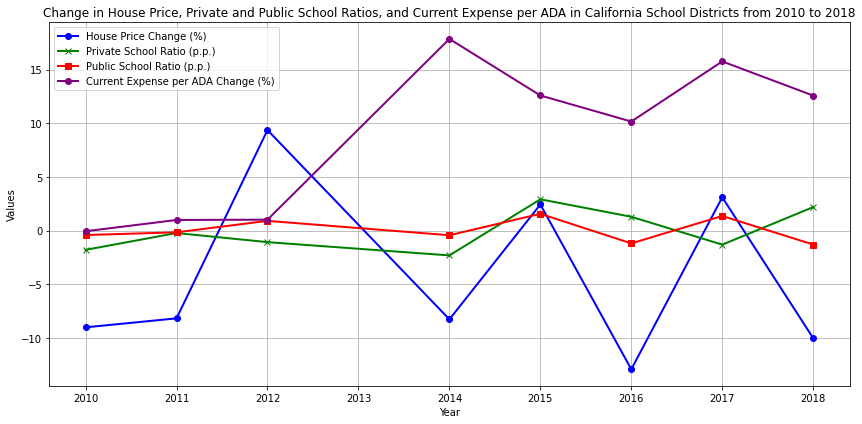

In [73]:
# Drop rows with NaN values in both 'current_expense_per_ada' and 'price_growth'
clean_data = merged_df.dropna(subset=['current_expense_per_ada_%change', 'price_%change'])

# Calculate the IQR for 'price_growth' to remove outliers
Q1_price_growth = clean_data['price_%change'].quantile(0.25)
Q3_price_growth = clean_data['price_%change'].quantile(0.75)
IQR_price_growth = Q3_price_growth - Q1_price_growth
lower_bound_price_growth = Q1_price_growth - 1.5 * IQR_price_growth
upper_bound_price_growth = Q3_price_growth + 1.5 * IQR_price_growth

# Filter out the outliers for 'price_growth'
filtered_data = clean_data[(clean_data['price_%change'] >= lower_bound_price_growth) & 
                           (clean_data['price_%change'] <= upper_bound_price_growth)]

# Group the filtered data by 'year' and calculate the average values for selected variables
avg_values_by_year_filtered = (
    filtered_data.groupby('year')[['price_%change', 'priv_st_ratio_change', 'pub_st_ratio_change']].mean())

# Group by year and calculate 'current_expense_per_ada_%change' for each year
avg_expense_by_year_scaled_filtered = filtered_data.groupby('year')['current_expense_per_ada_%change'].mean() 
 
plt.figure(figsize=(12, 6))

# Plot 'price_growth'
avg_values_by_year_filtered['price_%change'].plot(kind='line', marker='o', color='b', linestyle='-', 
                                                  linewidth=2, markersize=6, label='House Price Change (%)')

# Plot 'priv_st_ratio'
avg_values_by_year_filtered['priv_st_ratio_change'].plot(kind='line', marker='x', color='g', linestyle='-', 
                                                  linewidth=2, markersize=6, label='Private School Ratio (p.p.)')

# Plot 'pub_st_ratio'
avg_values_by_year_filtered['pub_st_ratio_change'].plot(kind='line', marker='s', color='r', linestyle='-', 
                                                  linewidth=2, markersize=6, label='Public School Ratio (p.p.)')

# Plot 'current_expense_per_ada'
avg_expense_by_year_scaled_filtered.plot(kind='line', marker='o', color='purple', linestyle='-', linewidth=2, 
                                                  markersize=6, label='Current Expense per ADA Change (%)')

# Add titles and labels
plt.title(
    'Change in House Price, Private and Public School Ratios, and Current Expense per ADA in California School Districts from 2010 to 2018')

plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("time_plot.png", dpi=300, bbox_inches='tight')
plt.show()

From 2010 to 2018, changes in public and private student-to-teacher ratios were generally small, typically shifting by one or two students. Interestingly, house price changes tend to move in the same direction as public school student-to-teacher ratio changes, though more pronounced. This could suggest that districts perceived as high quality attract more families, even if it slightly increases class sizes, leading to higher house prices. In contrast, private school student-to-teacher ratios showed no clear relationship with house prices over time.

<span style="font-size:24px; font-weight:bold;">Project 2</span>

<span style="font-size:20px; font-weight:bold;">2.1 The Message</span>

This project compares the relationship between changes in public and private school quality (i.e. funding, student-to-teacher ratio) with house price changes, with a focus on how these factors may influence the net asset value of high-income individuals who reside in high-quality neighborhoods. The analysis explores this relationship in California school districts, especially within the fourth and highest income quintiles, to identify patterns related to income inequality and regional differences influenced by climate, culture, and local policy.

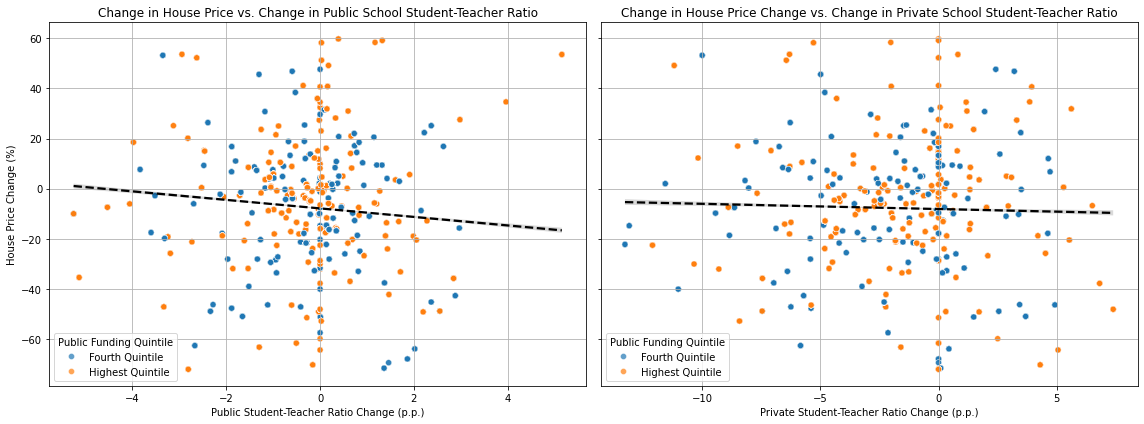

In [60]:
# Calculate IQRs and filter out outliers
Q1_price_growth = merged_df['price_%change'].quantile(0.25)
Q3_price_growth = merged_df['price_%change'].quantile(0.75)
IQR_price_growth = Q3_price_growth - Q1_price_growth
lower_bound_price_growth = Q1_price_growth - 1.5 * IQR_price_growth
upper_bound_price_growth = Q3_price_growth + 1.5 * IQR_price_growth

Q1_priv_st_ratio = merged_df['priv_st_ratio_change'].quantile(0.25)
Q3_priv_st_ratio = merged_df['priv_st_ratio_change'].quantile(0.75)
IQR_priv_st_ratio = Q3_priv_st_ratio - Q1_priv_st_ratio
lower_bound_priv_st_ratio = Q1_priv_st_ratio - 1.5 * IQR_priv_st_ratio
upper_bound_priv_st_ratio = Q3_priv_st_ratio + 1.5 * IQR_priv_st_ratio

Q1_pub_st_ratio = merged_df['pub_st_ratio_change'].quantile(0.25)
Q3_pub_st_ratio = merged_df['pub_st_ratio_change'].quantile(0.75)
IQR_pub_st_ratio = Q3_pub_st_ratio - Q1_pub_st_ratio
lower_bound_pub_st_ratio = Q1_pub_st_ratio - 1.5 * IQR_pub_st_ratio
upper_bound_pub_st_ratio = Q3_pub_st_ratio + 1.5 * IQR_pub_st_ratio

# Filter out outliers
merged_no_outliers_df = merged_df[
    (merged_df['price_%change'] >= lower_bound_price_growth) &
    (merged_df['price_%change'] <= upper_bound_price_growth) &
    (merged_df['priv_st_ratio_change'] >= lower_bound_priv_st_ratio) &
    (merged_df['priv_st_ratio_change'] <= upper_bound_priv_st_ratio) &
    (merged_df['pub_st_ratio_change'] >= lower_bound_pub_st_ratio) &
    (merged_df['pub_st_ratio_change'] <= upper_bound_pub_st_ratio)
]

# Aggregate to district level
aggregated_df = merged_no_outliers_df.groupby('district')[['priv_st_ratio_change', 'pub_st_ratio_change', 
                                                           'price_%change']].mean().reset_index()
aggregated_df = aggregated_df.merge(merged_no_outliers_df[['expense_quintile', 'district']], on='district', 
                                                            how='left')

aggregated_df = aggregated_df[aggregated_df['expense_quintile'] != 'Middle Quintile']

aggregated_df['expense_quintile'] = aggregated_df['expense_quintile'].cat.remove_unused_categories()

# Side-by-side scatter plots with regression lines
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Left: Public schools
sns.scatterplot(
    data=aggregated_df,
    x='pub_st_ratio_change',
    y='price_%change',
    hue='expense_quintile',
    ax=axes[0],
    alpha=0.7
)
sns.regplot(
    data=aggregated_df,
    x='pub_st_ratio_change',
    y='price_%change',
    scatter=False,
    ax=axes[0],
    color='black',
    line_kws={'linestyle': 'dashed'}
)
axes[0].set_title('Change in House Price vs. Change in Public School Student-Teacher Ratio')
axes[0].set_xlabel('Public Student-Teacher Ratio Change (p.p.)')
axes[0].set_ylabel('House Price Change (%)')
axes[0].grid(True)

# Right: Private schools
sns.scatterplot(
    data=aggregated_df,
    x='priv_st_ratio_change',
    y='price_%change',
    hue='expense_quintile',
    ax=axes[1],
    alpha=0.7,
)
sns.regplot(
    data=aggregated_df,
    x='priv_st_ratio_change',
    y='price_%change',
    scatter=False,
    ax=axes[1],
    color='black',
    line_kws={'linestyle': 'dashed'}
)
axes[1].set_title('Change in House Price Change vs. Change in Private School Student-Teacher Ratio')
axes[1].set_xlabel('Private Student-Teacher Ratio Change (p.p.)')
axes[1].set_ylabel('')  
axes[1].grid(True)

for ax in axes:
    ax.legend(title='Public Funding Quintile')

plt.tight_layout()
plt.savefig("main_message_plot.png", dpi=300, bbox_inches='tight')
plt.show()

There is a generally negative relationship between changes in student-to-teacher ratio and house prices across higher public funding quintiles, particularly in public schools. An increase in students per teacher year-over-year may indicate a decline in school quality, potentially decreasing local house values. This makes student-to-teacher ratio a potential leading indicator for real estate professionals advising high-income clients. A regression model is needed to confirm statistical significance, and a geographic visualization may help reveal regional effects.

<span style="font-size:20px; font-weight:bold;">2.2 Maps and Interpretations</span>

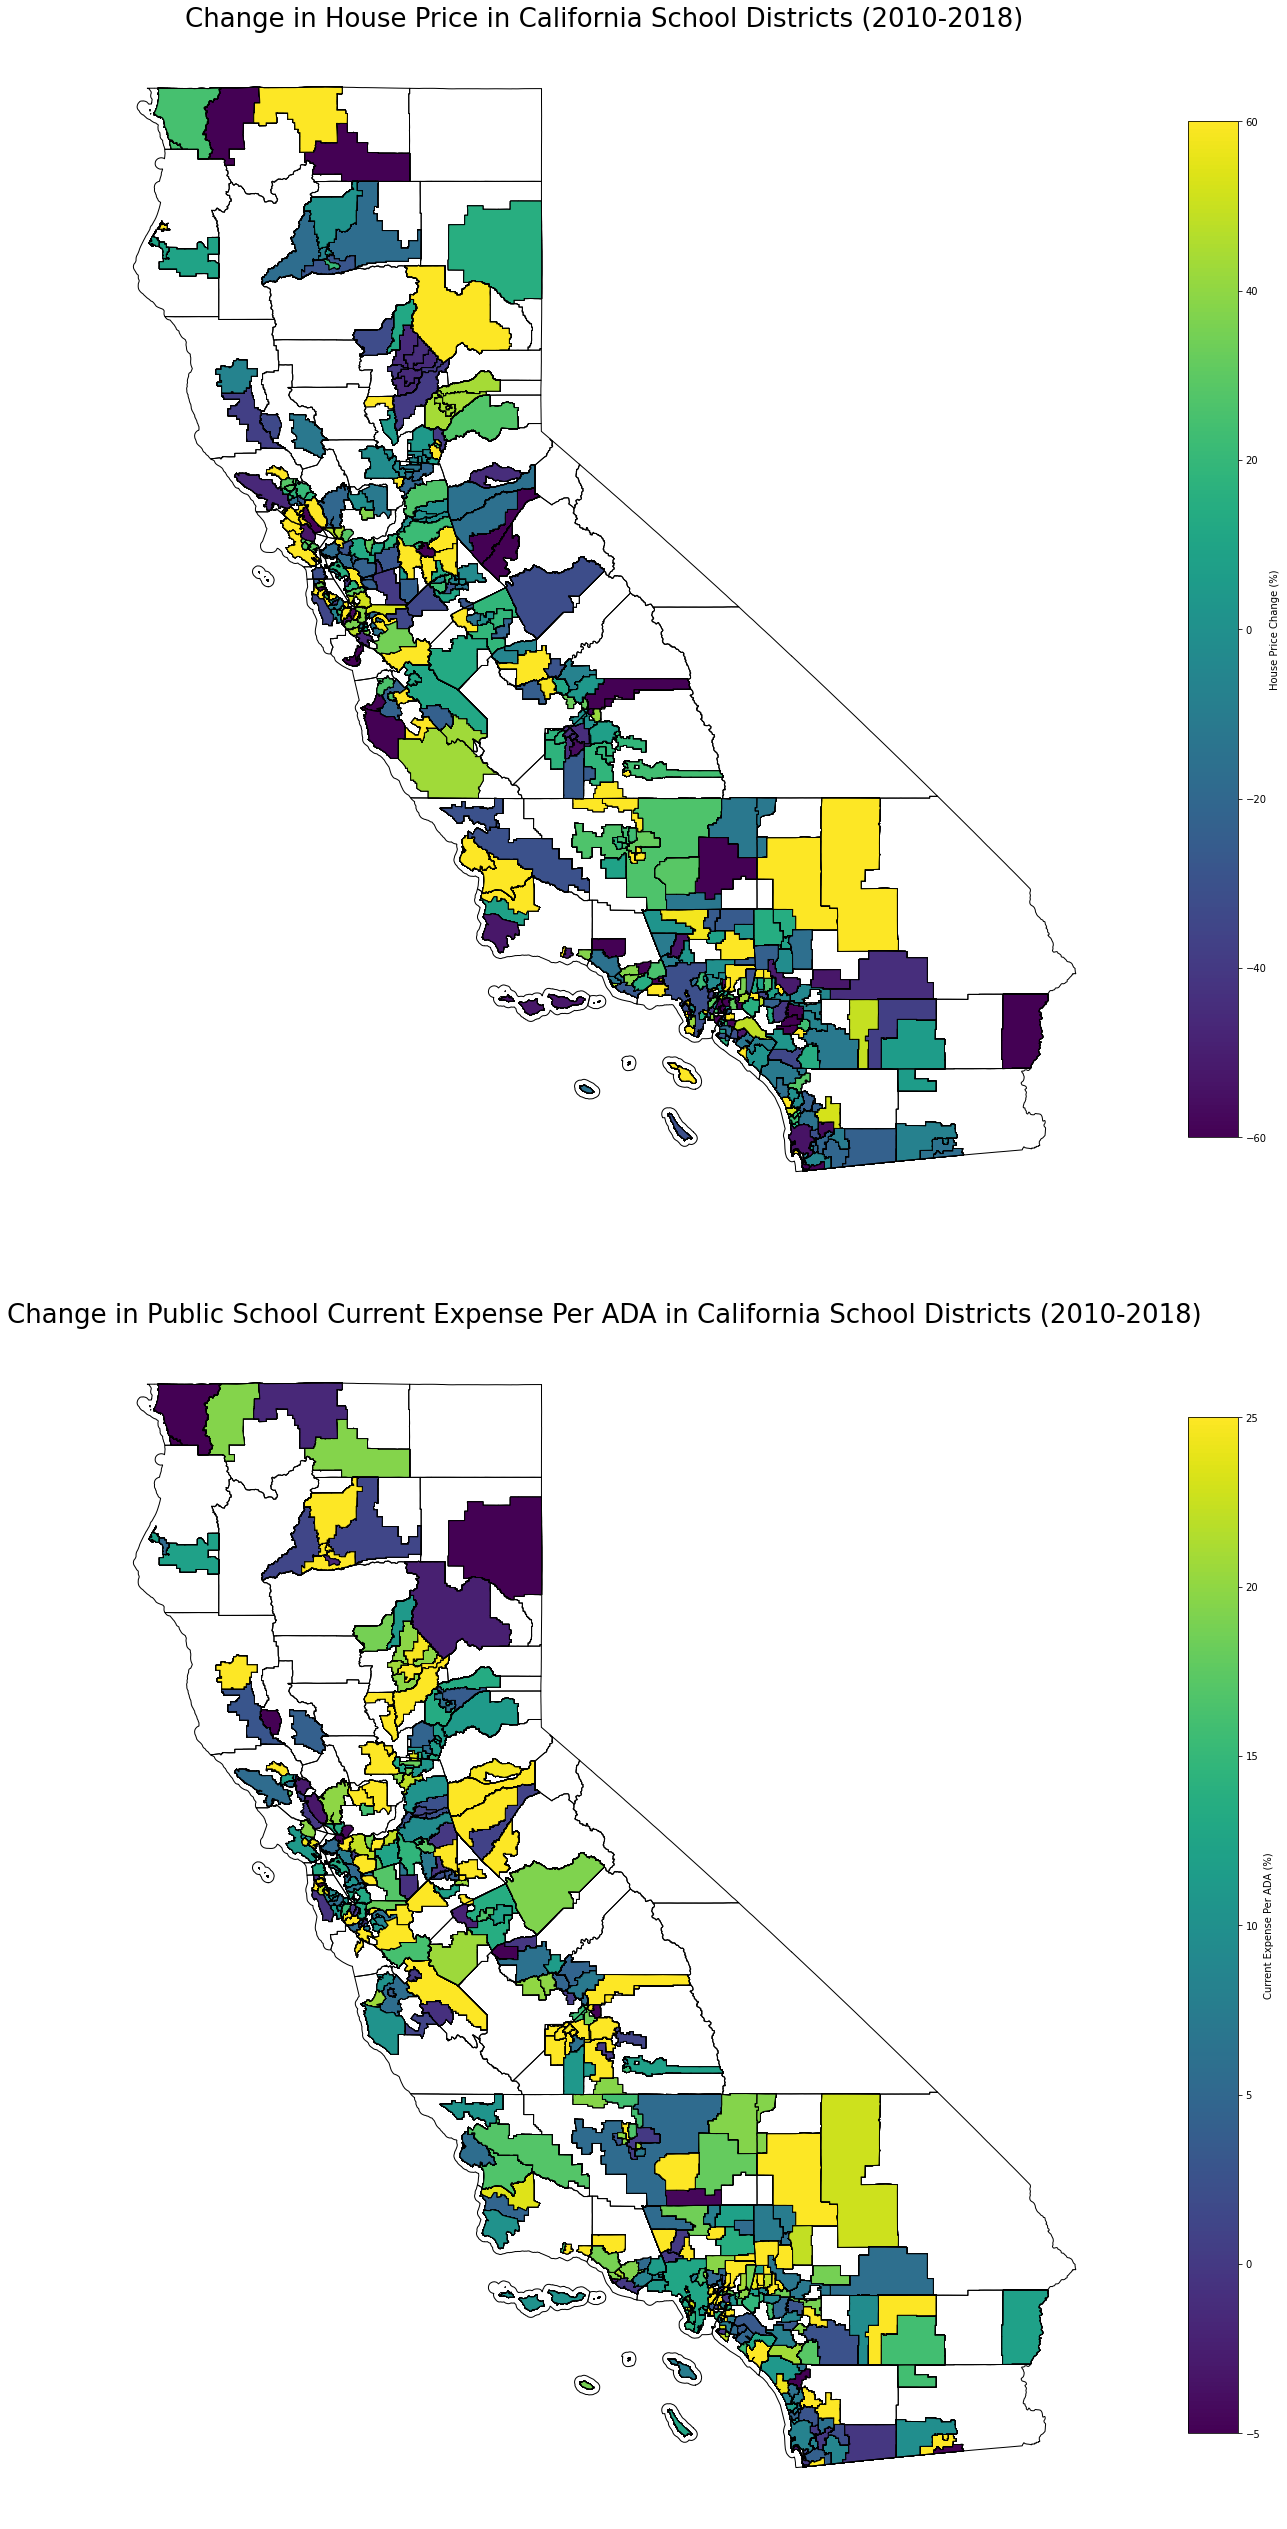

In [24]:
# MAP VISUALIZATION 1: HEATMAPS OF CHANGE IN HOUSE PRICE AND PUBLIC SCHOOL FUNDING 

import geopandas as gpd
from shapely.geometry import Point

# Read California school district and county shapefile
shapefile_path = (
    "/Users/capi/Downloads/School_District_Characteristics_2017-18/School_District_Characteristics_2017-18.shp")
california_districts = gpd.read_file(shapefile_path)

shapefile_path = "/Users/capi/Downloads/tl_2017_us_county/tl_2017_us_county.shp"
california_counties = gpd.read_file(shapefile_path)

# Filter counties for California
california_counties = california_counties[california_counties['STATEFP'] == '06']

# Filter districts for California districts
california_districts = california_districts[california_districts['STATENAME'] == 'CALIFORNIA']

# Ensure the geometry is valid
california_districts = california_districts.explode(ignore_index=True)

# Case convert to uppercase for district names for merging
california_districts = california_districts.rename(columns={'LEA_NAME': 'district'})

# First map: Merge on the district column for pub_st_ratio
merged_gdf_3 = california_districts.merge(merged_df[['district', 'pub_st_ratio_change']], 
                                         on='district', how='left')

# First map: 
merged_gdf_3 = california_districts.merge(merged_df[['district', 'price_%change']], on='district', how='left')

# Remove rows with invalid geometries or NaN values
merged_gdf_3 = merged_gdf_3[merged_gdf_3.is_valid]
merged_gdf_3 = merged_gdf_3.dropna(subset=['price_%change'])

# Second map:
merged_gdf_4 = california_districts.merge(merged_df[['district', 'current_expense_per_ada_%change']], 
                                         on='district', how='left')

# Remove rows with invalid geometries or NaN values
merged_gdf_4 = merged_gdf_4[merged_gdf_4.is_valid]
merged_gdf_4 = merged_gdf_4.dropna(subset=['current_expense_per_ada_%change'])

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 36))

# First map:
ax1 = axes[0]

cmap = plt.cm.viridis

# Limit range for pub_st_ratio
norm1 = plt.Normalize(vmin=-60, vmax=60)  

# Plot districts with colour based on price_%change
merged_gdf_3.plot(column='price_%change', ax=ax1, legend=True,
                  legend_kwds={'label': "House Price Change (%)",
                               'orientation': "vertical", 'shrink': 0.8},
                  cmap=cmap, norm=norm1, edgecolor='black', linewidth=1.0)



# Set title and labels for the first map
ax1.set_title('Change in House Price in California School Districts (2010-2018)', fontsize=26)
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)

# Overlay counties on top of the school district map
california_counties.plot(ax=ax1, color='none', edgecolor='black', linewidth=1.0)

# Second map: 
ax2 = axes[1]

# Normalize the data for better color distribution
norm2 = plt.Normalize(vmin=-5, vmax=25) 

# Plot districts with color based on current_expense_per_ada_%change
merged_gdf_4.plot(column='current_expense_per_ada_%change', ax=ax2, legend=True,
                  legend_kwds={'label': "Current Expense Per ADA Change (%)",
                               'orientation': 'vertical', 'shrink': 0.8},
                  cmap=cmap, norm=norm2, edgecolor='black', linewidth=1.0)

# Set title and labels for the second map
ax2.set_title('Change in Public School Current Expense Per ADA in California School Districts (2010-2018)', 
              fontsize=26)
ax2.set_xlabel('Longitude', fontsize=12)
ax2.set_ylabel('Latitude', fontsize=12)

# Overlay counties on top of the school district map
california_counties.plot(ax=ax2, color='none', edgecolor='black', linewidth=1.0)

# Remove both x and y axis labels and ticks for both maps
for ax in axes:
    ax.set_axis_off()

# Remove the black border box around the state
fig.tight_layout(pad=0.01)

# Show the plot
plt.show()

Some school districts in major metro areas like Los Angeles, San Francisco, and Silicon Valley, as well as in the Central Valley, show high house price growth. However, similar growth patterns also appear in suburban and rural areas, indicating no clear regional trend. In cities, districts may show both rapid growth and decline depending on income distributions. High-income households tend to drive house prices up through their demand and school investments, while districts dominated by middle or low-income residents may see negative price changes due to affordability constraints. Public school spending per student is generally higher in urban areas and the Central Valley and tends to decrease in more rural districts. This may reflect larger state funding allocations to cities, driven by higher populations and the goal of supporting students who may remain in-state for university and employment, thereby fueling district and state economies. Enhancing local school quality can in turn drive up house prices, a consideration for high-income families choosing where to settle.

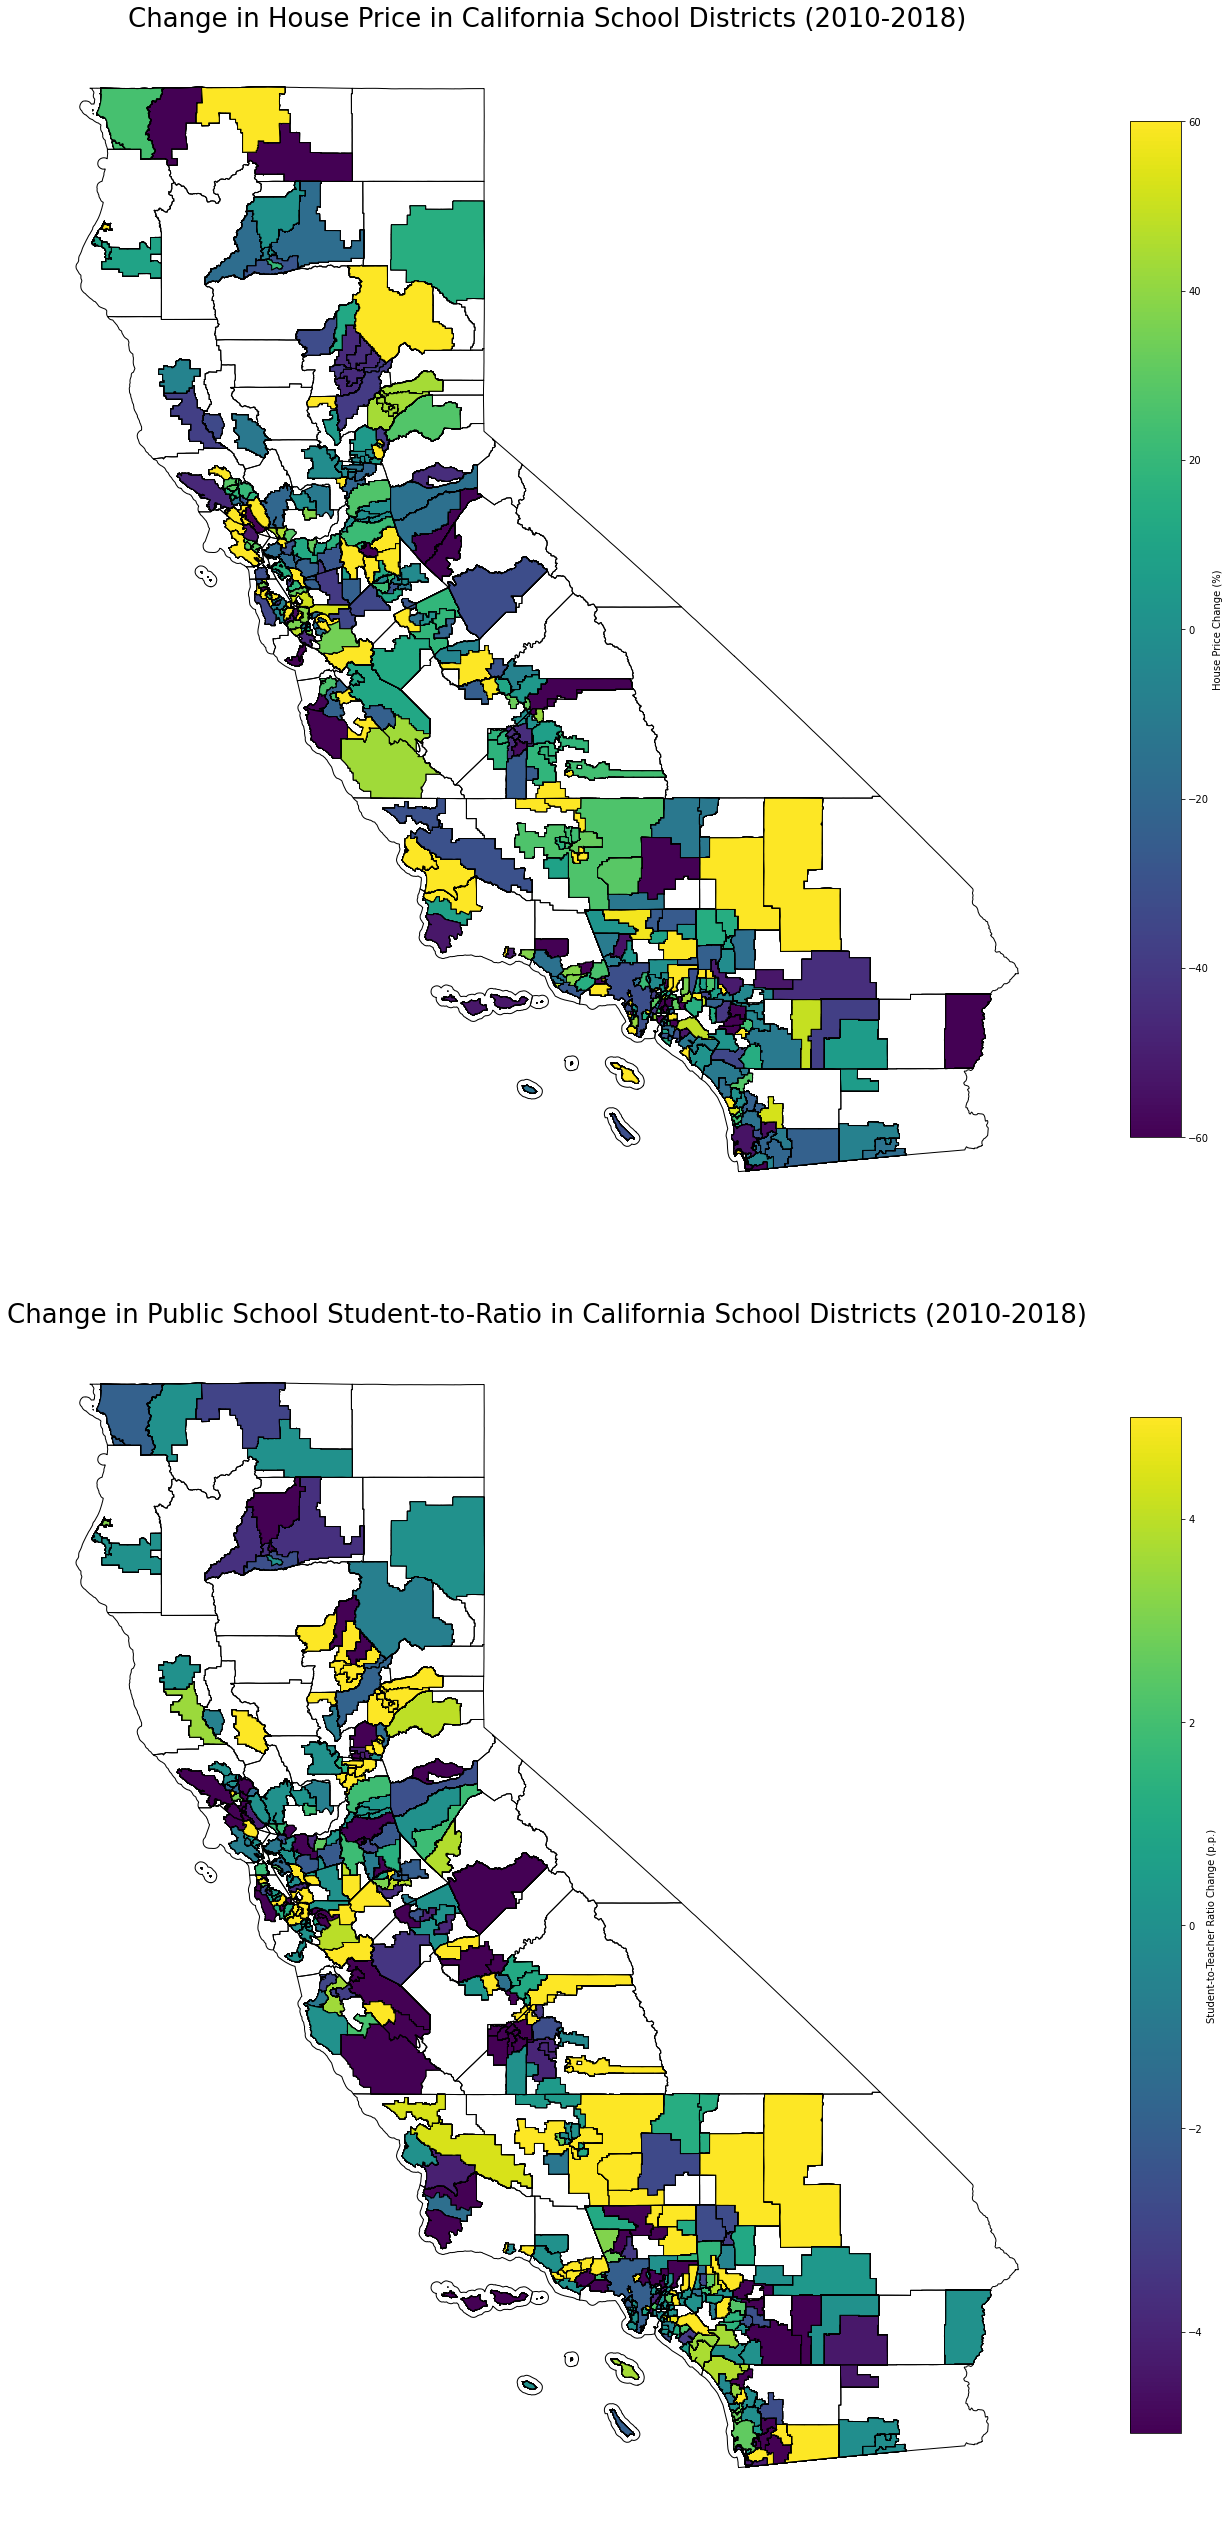

In [26]:
# MAP VISUALIZATION 2: HEATMAPS OF CHANGE IN HOUSE PRICE AND PUBLIC SCHOOL STUDENT-TO-TEACHER RATIO

# First map: 
merged_gdf_5 = california_districts.merge(merged_df[['district', 'price_%change']], on='district', how='left')

merged_gdf_5 = merged_gdf_5[merged_gdf_5.is_valid]
merged_gdf_5 = merged_gdf_5.dropna(subset=['price_%change'])

# Second map:
merged_gdf_6 = california_districts.merge(merged_df[['district', 'pub_st_ratio_change']], 
                                         on='district', how='left')

merged_gdf_6 = merged_gdf_6[merged_gdf_6.is_valid]
merged_gdf_6 = merged_gdf_6.dropna(subset=['pub_st_ratio_change'])

fig, axes = plt.subplots(2, 1, figsize=(18, 36))

# First map:
ax1 = axes[0]

cmap = plt.cm.viridis

# Limit range for pub_st_ratio
norm1 = plt.Normalize(vmin=-60, vmax=60)  

# Plot districts with colour
merged_gdf_5.plot(column='price_%change', ax=ax1, legend=True,
                  legend_kwds={'label': "House Price Change (%)",
                               'orientation': "vertical", 'shrink': 0.8},
                  cmap=cmap, norm=norm1, edgecolor='black', linewidth=1.0)



ax1.set_title('Change in House Price in California School Districts (2010-2018)', fontsize=26)
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)

california_counties.plot(ax=ax1, color='none', edgecolor='black', linewidth=1.0)

# Second map: 
ax2 = axes[1]

norm2 = plt.Normalize(vmin=-5, vmax=5) 

merged_gdf_6.plot(column='pub_st_ratio_change', ax=ax2, legend=True,
                  legend_kwds={'label': "Student-to-Teacher Ratio Change(p.p.)",
                               'orientation': 'vertical', 'shrink': 0.8},
                  cmap=cmap, norm=norm2, edgecolor='black', linewidth=1.0)

ax2.set_title('Change in Public School Student-to-Ratio in California School Districts (2010-2018)', fontsize=26)
ax2.set_xlabel('Longitude', fontsize=12)
ax2.set_ylabel('Latitude', fontsize=12)

california_counties.plot(ax=ax2, color='none', edgecolor='black', linewidth=1.0)

for ax in axes:
    ax.set_axis_off()

fig.tight_layout(pad=0.01)
plt.show()

Urban districts tend to show more positive changes in public school student-to-teacher ratios, possibly due to rising enrollment from population influxes. Yet this trend varies, and some urban districts show declining class sizes. Interestingly, some districts with increasing student-to-teacher ratios also saw house price growth, which contradicts typical expectations that larger class sizes reduce perceived school quality. Confounding variables like crime, employment opportunities, and school policies likely influence these patterns and must be controlled for.

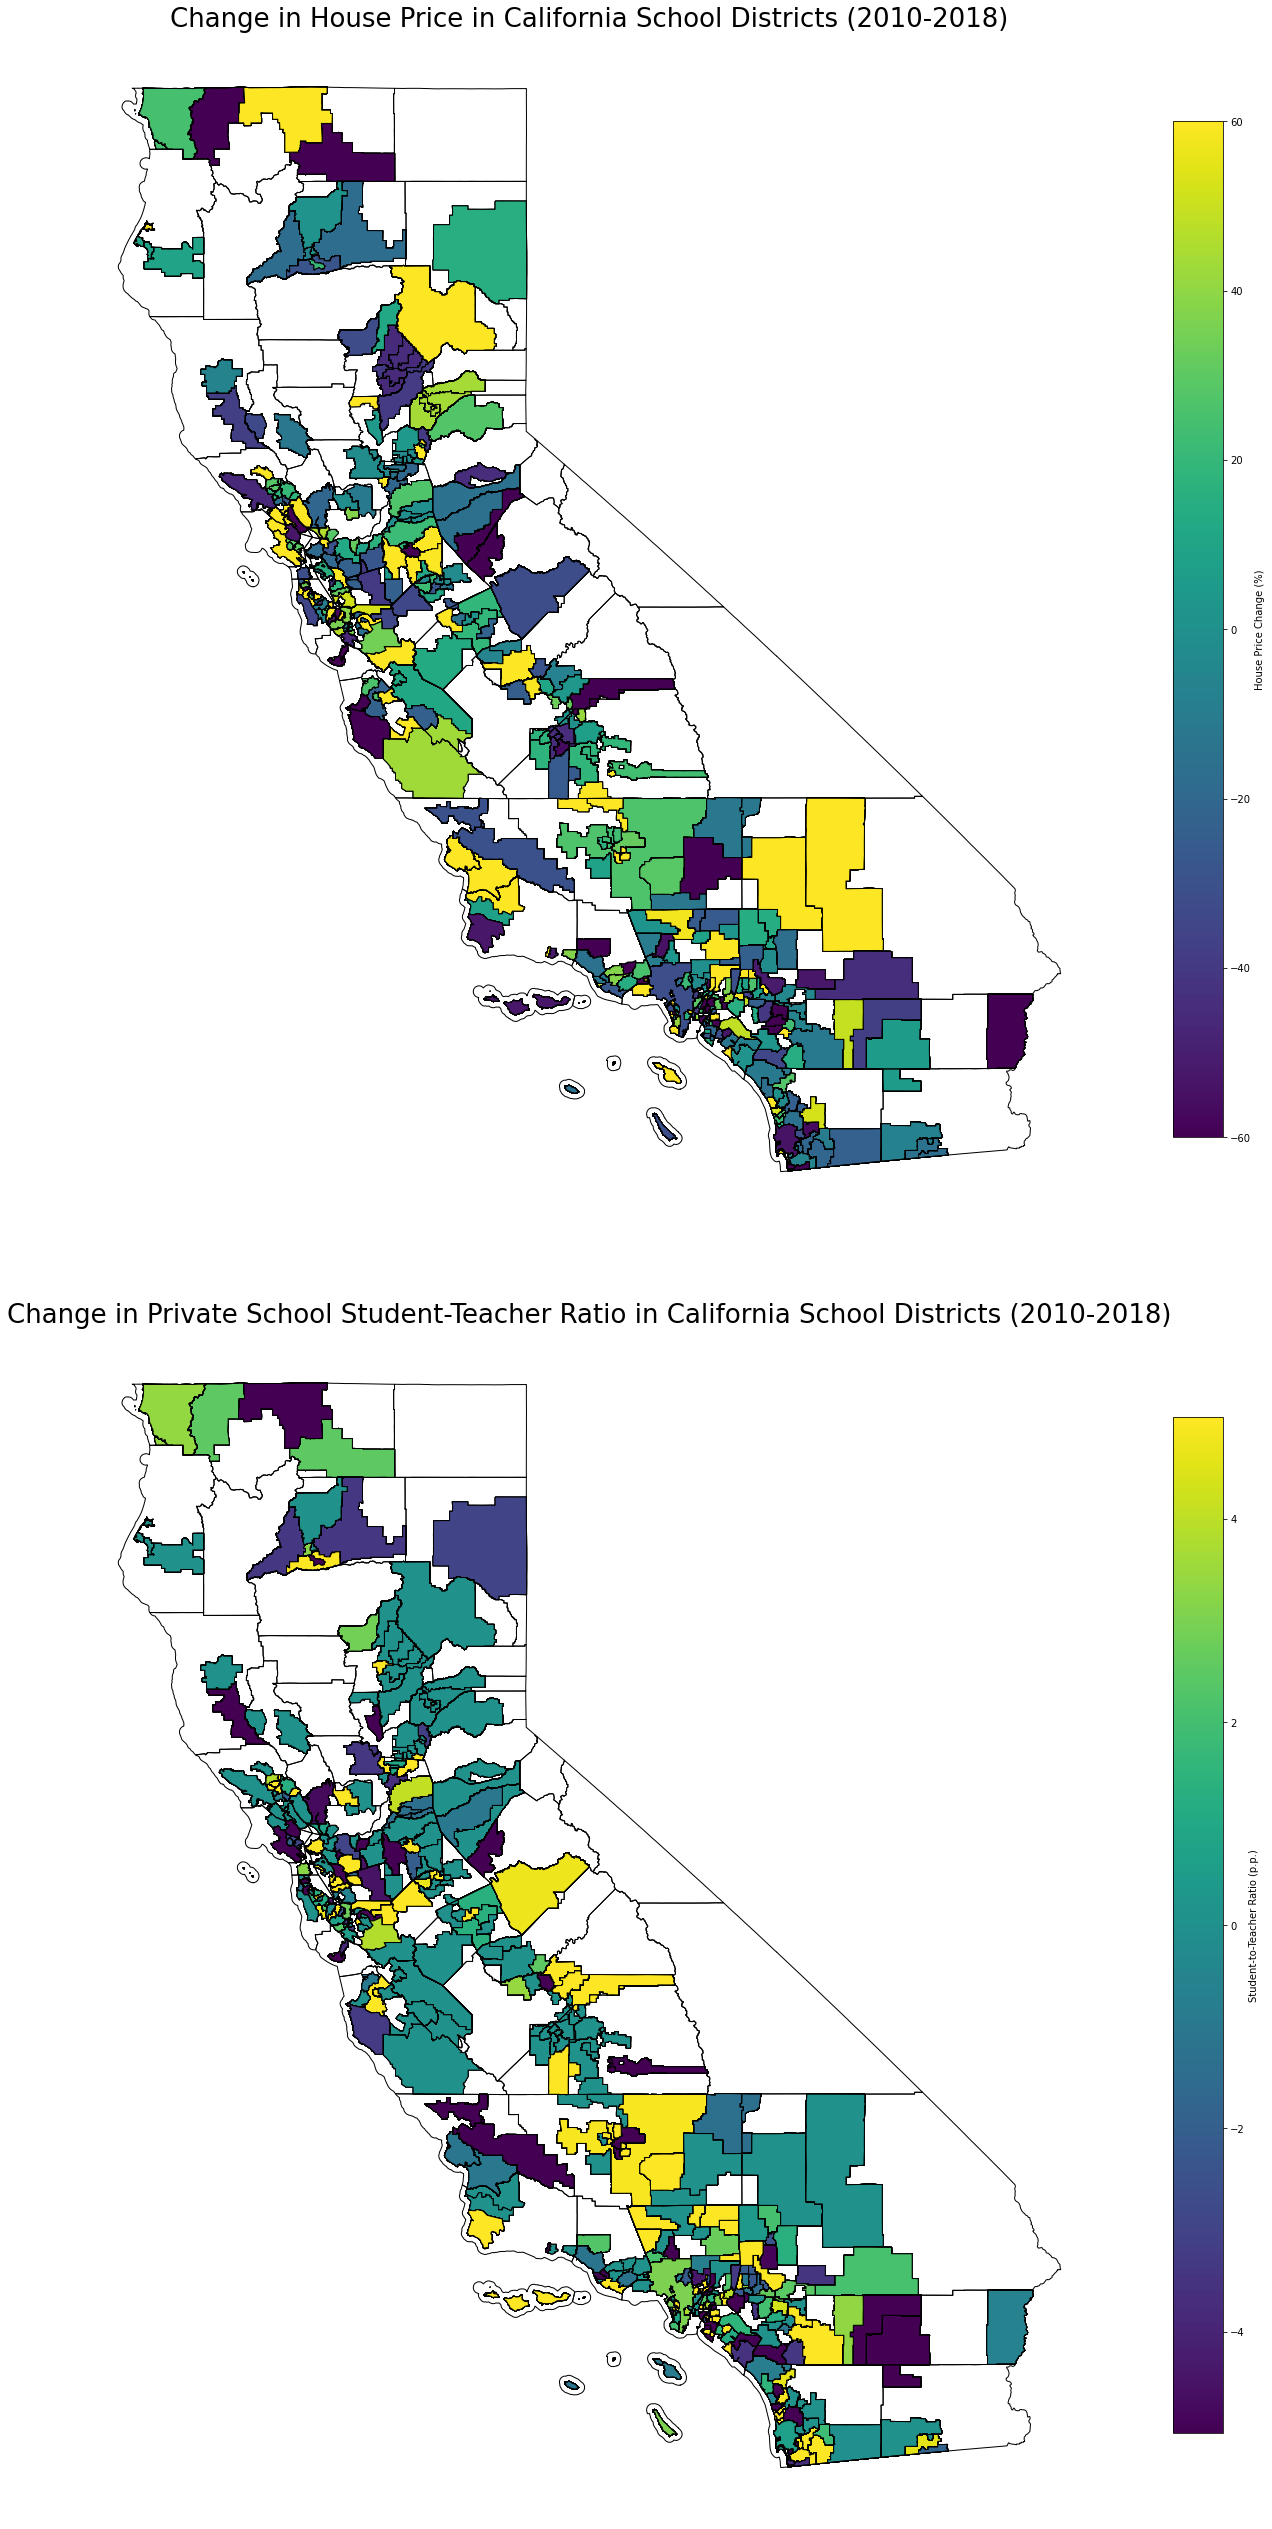

In [27]:
# MAP VISUALIZATION 3: HEATMAPS OF CHANGE IN HOUSE PRICE AND PRIVATE SCHOOL STUDENT-TO-TEACHER RATIO 

# First map: 
merged_gdf_7 = california_districts.merge(merged_df[['district', 'price_%change']], on='district', how='left')

# Remove rows with invalid geometries or NaN values
merged_gdf_7 = merged_gdf_7[merged_gdf_7.is_valid]
merged_gdf_7 = merged_gdf_7.dropna(subset=['price_%change'])

# Second map:
merged_gdf_8 = california_districts.merge(merged_df[['district', 'priv_st_ratio_change']], 
                                         on='district', how='left')

# Remove rows with invalid geometries or NaN values
merged_gdf_8 = merged_gdf_8[merged_gdf_8.is_valid]
merged_gdf_8 = merged_gdf_8.dropna(subset=['priv_st_ratio_change'])

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 36))

# First map:
ax1 = axes[0]

cmap = plt.cm.viridis

# Limit range 
norm1 = plt.Normalize(vmin=-60, vmax=60)  

# Plot districts with colour
merged_gdf_7.plot(column='price_%change', ax=ax1, legend=True,
                  legend_kwds={'label': "House Price Change (%)",
                               'orientation': "vertical", 'shrink': 0.8},
                  cmap=cmap, norm=norm1, edgecolor='black', linewidth=1.0)



# Set title and labels for the first map
ax1.set_title('Change in House Price in California School Districts (2010-2018)', fontsize=26)
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)

# Overlay counties on top of the school district map
california_counties.plot(ax=ax1, color='none', edgecolor='black', linewidth=1.0)

# Second map: 
ax2 = axes[1]

# Normalize the data 
norm2 = plt.Normalize(vmin=-5, vmax=5) 

# Plot counties with color 
merged_gdf_8.plot(column='priv_st_ratio_change', ax=ax2, legend=True,
                  legend_kwds={'label': "Student-to-Teacher Ratio Change",
                               'orientation': 'vertical', 'shrink': 0.8},
                  cmap=cmap, norm=norm2, edgecolor='black', linewidth=1.0)

# Set title and labels for the second map
ax2.set_title('Change in Private School Student-Teacher Ratio in California School Districts (2010-2018)', fontsize=26)
ax2.set_xlabel('Longitude', fontsize=12)
ax2.set_ylabel('Latitude', fontsize=12)

# Overlay counties on top of the school district map
california_counties.plot(ax=ax2, color='none', edgecolor='black', linewidth=1.0)

for ax in axes:
    ax.set_axis_off()

fig.tight_layout(pad=0.01)

plt.show()

Most school districts report little change in private school student-to-teacher ratios. However, metropolitan districts show a mix of increases and decreases. Cities often have a wider variety of private schools, giving parents more choices. If dissatisfied, they can switch more easily between schools (closer distance), leading to greater variable class sizes. Districts with increasing private school class sizes sometimes also show declining house prices, possibly reflecting declining perceived school quality. Regression analysis would determine if this relationship is statistically significant.

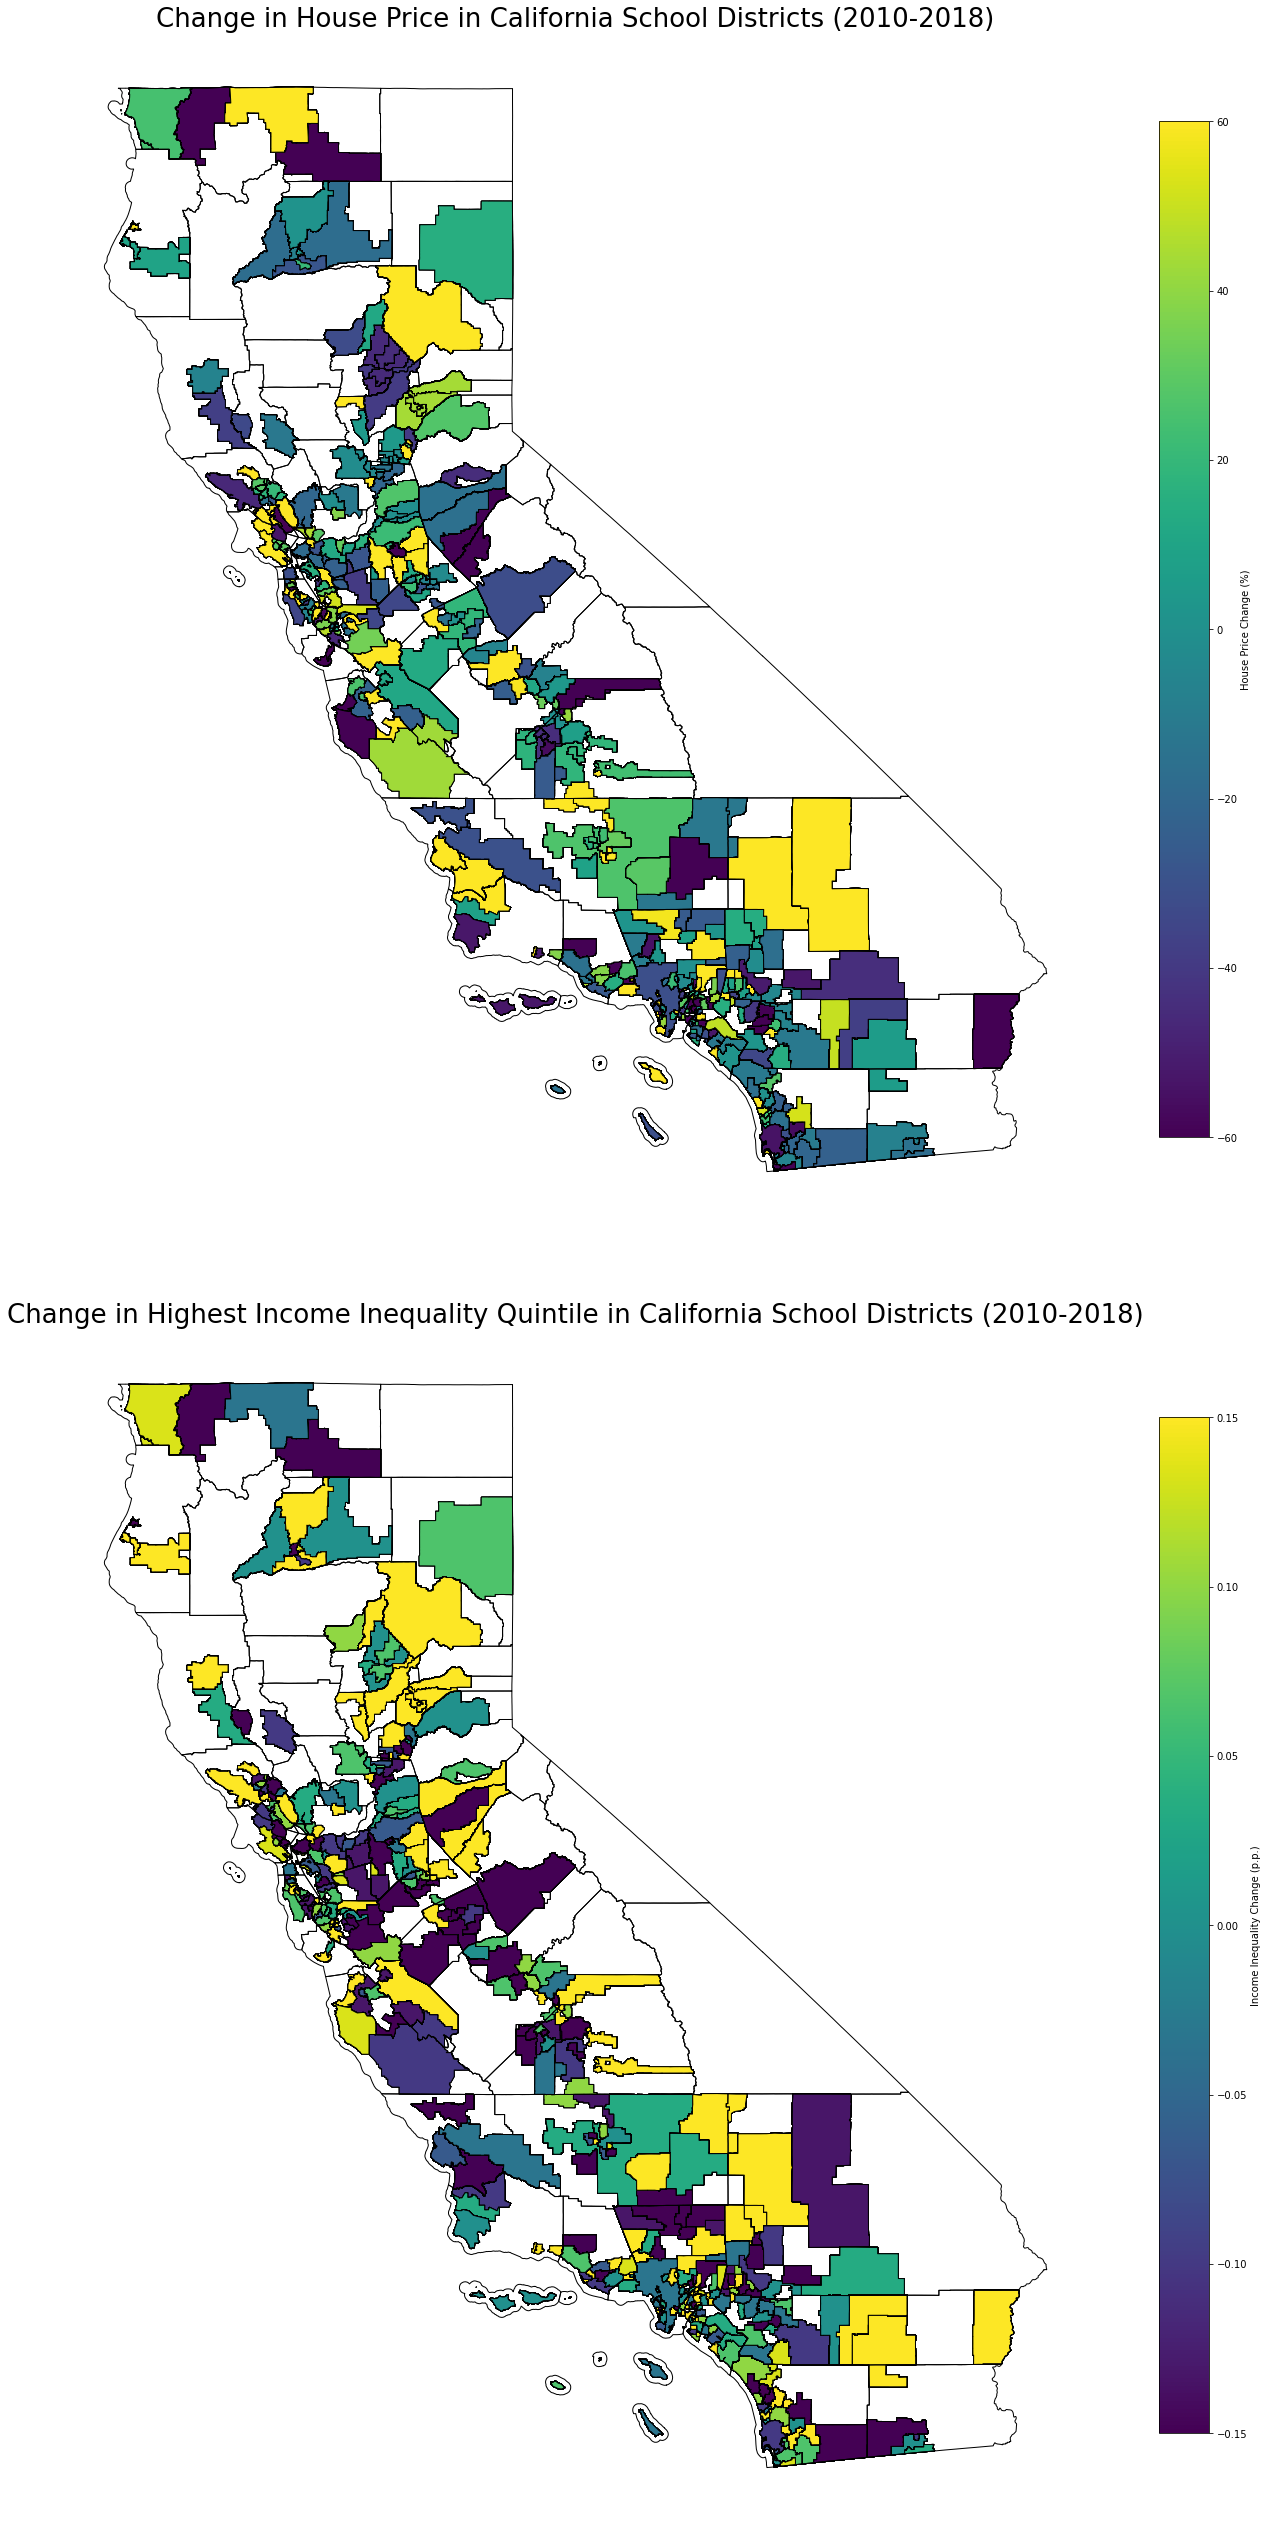

In [28]:
# MAP VISUALIZATION 4: HEATMAPS OF CHANGE IN HOUSE PRICE AND INCOME INEQUALITY

# First map: 
merged_gdf_9 = california_districts.merge(merged_df[['district', 'price_%change']], on='district', how='left')

# Remove rows with invalid geometries or NaN values
merged_gdf_9 = merged_gdf_9[merged_gdf_9.is_valid]
merged_gdf_9 = merged_gdf_9.dropna(subset=['price_%change'])

highest_quintile_df = merged_df[merged_df['quintile'] == 'Highest Quintile']

# Second map:
highest_quintile_df = california_districts.merge(merged_df[['district', 'inc_percent_change']], 
                                         on='district', how='left')

# Remove rows with invalid geometries or NaN values
highest_quintile_df = highest_quintile_df[highest_quintile_df.is_valid]
highest_quintile_df = highest_quintile_df.dropna(subset=['inc_percent_change'])

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 36))

# First map:
ax1 = axes[0]

cmap = plt.cm.viridis

# Limit range 
norm1 = plt.Normalize(vmin=-60, vmax=60)  

# Plot districts with colour
merged_gdf_9.plot(column='price_%change', ax=ax1, legend=True,
                  legend_kwds={'label': "House Price Change (%)",
                               'orientation': "vertical", 'shrink': 0.8},
                  cmap=cmap, norm=norm1, edgecolor='black', linewidth=1.0)



# Set title and labels for the first map
ax1.set_title('Change in House Price in California School Districts (2010-2018)', fontsize=26)
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)

# Overlay counties on top of the school district map
california_counties.plot(ax=ax1, color='none', edgecolor='black', linewidth=1.0)

# Second map: 
ax2 = axes[1]

# Normalize the data for better color distribution
norm2 = plt.Normalize(vmin=-0.15, vmax=0.15) 

# Plot districts with color 
highest_quintile_df.plot(column='inc_percent_change', ax=ax2, legend=True,
                  legend_kwds={'label': "Income Inequality Change (p.p.)",
                               'orientation': 'vertical', 'shrink': 0.8},
                  cmap=cmap, norm=norm2, edgecolor='black', linewidth=1.0)

# Set title and labels for the second map
ax2.set_title('Change in Highest Income Inequality Quintile in California School Districts (2010-2018)', 
              fontsize=26)
ax2.set_xlabel('Longitude', fontsize=12)
ax2.set_ylabel('Latitude', fontsize=12)

# Overlay counties on top of the school district map
california_counties.plot(ax=ax2, color='none', edgecolor='black', linewidth=1.0)

for ax in axes:
    ax.set_axis_off()

fig.tight_layout(pad=0.01)

plt.show()

Income inequality among the top 20% of earners has grown more in metropolitan districts. While urban districts show mixed house price trends, those with rising top-quintile income shares often see increasing house prices. This could reflect greater investment in schools by wealthy households, particularly private institutions, enhancing perceived quality and local housing demand. However, this hypothesis also needs regression testing.

<span style="font-size:20px; font-weight:bold;">2.3 Regressions</span>

In [70]:
# REGRESSION SUMMARY TABLE 1

import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

highest_quintile_df = merged_df[merged_df['quintile'] == 'Highest Quintile']

highest_quintile_df.loc[:, 'priv_avg_gr_%change'] = highest_quintile_df['priv_avg_gr_%change'].astype('float64')
highest_quintile_df.loc[:, 'pub_avg_gr_%change'] = highest_quintile_df['pub_avg_gr_%change'].astype('float64')

highest_quintile_df = highest_quintile_df.dropna(subset=['priv_st_ratio_change', 'pub_st_ratio_change', 
                                            'current_expense_per_ada_%change', 'inc_percent_change', 
                                            'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 
                                            'pub_avg_gr_%change', 'price_%change'])

highest_quintile_df['level'] = highest_quintile_df['level'].map({1.0: 'elementary', 2.0: 'middle', 3.0: 
                                                                 'high_school'})

dummies = pd.get_dummies(highest_quintile_df['level'], drop_first=False)
dummies = dummies.astype(int)
highest_quintile_df = pd.concat([highest_quintile_df, dummies], axis=1)

# Create interaction terms
highest_quintile_df['priv_st_highest_inc_qu'] = (
                highest_quintile_df['priv_st_ratio_change'] * highest_quintile_df['inc_percent_change'])
    
highest_quintile_df['priv_st_high'] = (
                highest_quintile_df['priv_st_ratio_change'] * highest_quintile_df['high_school'])

highest_quintile_df['pub_st_highest_inc_qu'] = (
                highest_quintile_df['pub_st_ratio_change'] * highest_quintile_df['inc_percent_change'])

highest_quintile_df['pub_st_high'] = (
                highest_quintile_df['pub_st_ratio_change'] * highest_quintile_df['high_school'])

highest_quintile_df['current_expense_highest_inc_qu'] = (
                highest_quintile_df['current_expense_per_ada_%change'] * highest_quintile_df['inc_percent_change'])

highest_quintile_df['const'] = 1

# Create lists of variables to be used in each regression, now including interaction terms
X1 = ['const', 'priv_st_ratio_change', 'pub_st_ratio_change', 'current_expense_per_ada_%change', 
      'inc_percent_change']
X2 = ['const', 'priv_st_ratio_change', 'pub_st_ratio_change', 'current_expense_per_ada_%change', 
      'inc_percent_change', 'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 'pub_avg_gr_%change']
X3 = ['const',  'priv_st_ratio_change', 'pub_st_ratio_change', 'current_expense_per_ada_%change', 
      'inc_percent_change', 'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 'pub_avg_gr_%change', 
      'priv_st_highest_inc_qu', 'pub_st_highest_inc_qu']
X4 = ['const',  'priv_st_ratio_change', 'pub_st_ratio_change', 'current_expense_per_ada_%change', 
      'inc_percent_change', 'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 'pub_avg_gr_%change', 
      'priv_st_highest_inc_qu', 'pub_st_highest_inc_qu', 'current_expense_highest_inc_qu']
X5 = ['const',  'priv_st_ratio_change', 'pub_st_ratio_change', 'current_expense_per_ada_%change', 
      'inc_percent_change', 'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 'pub_avg_gr_%change', 
      'priv_st_highest_inc_qu', 'pub_st_highest_inc_qu', 'current_expense_highest_inc_qu', 'priv_st_high', 
      'pub_st_high']

def clean_and_fit_ols(df, x_vars, y_var='price_%change'):
    model_df = df[x_vars + [y_var]].copy()

    # Convert all to numeric and cast to float64
    for col in model_df.columns:
        model_df[col] = pd.to_numeric(model_df[col], errors='coerce').astype('float64')

    # Drop rows with NaNs or Infs
    model_df = model_df.replace([np.inf, -np.inf], np.nan).dropna()

    X = model_df[x_vars]
    y = model_df[y_var]
    
    # Fit model
    return sm.OLS(y, X).fit()

reg1 = clean_and_fit_ols(highest_quintile_df, X1)
reg2 = clean_and_fit_ols(highest_quintile_df, X2)
reg3 = clean_and_fit_ols(highest_quintile_df, X3)
reg4 = clean_and_fit_ols(highest_quintile_df, X4)
reg5 = clean_and_fit_ols(highest_quintile_df, X5)

# Prepare a summary table with R-squared and number of observations
info_dict = {'R-squared': lambda x: f"{x.rsquared:.2f}", 'No. observations': lambda x: f"{int(x.nobs)}"}

# Create a summary table using summary_col
results_table = summary_col(results=[reg1, reg2, reg3, reg4, reg5],
                           float_format='%0.2f',
                           stars=True,
                           model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'],
                           info_dict=info_dict,
                           regressor_order=['const', 'priv_st_ratio_change', 'pub_st_ratio_change', 
                                            'current_expense_per_ada_%change', 'inc_percent_change', 
                                            'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 
                                            'pub_avg_gr_%change', 'priv_st_highest_inc_qu', 
                                            'pub_st_highest_inc_qu', 'current_expense_highest_inc_qu', 
                                            'priv_st_high', 'pub_st_high'])

# Create a formatted table with Stargazer
stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5])

stargazer.rename_covariates({
    'const': 'Constant',
    'priv_st_ratio_change': 'private student-teacher ratio change',
    'pub_st_ratio_change': 'public student-teacher ratio change',
    'current_expense_per_ada_%change': 'public education spending change',
    'inc_percent_change': 'income inequality change',
    'priv_er_change': 'private enrollment rate change',
    'pub_er_change': 'public enrollment rate change',
    'priv_avg_gr_%change': 'private grade span change',
    'pub_avg_gr_%change': 'public grade span change',
    'priv_st_highest_inc_qu': 'private student-teacher ratio change × income inequality change',
    'pub_st_highest_inc_qu': 'public student-teacher ratio change × income inequality change',
    'current_expense_highest_inc_qu': 'public education spending change × income inequality change',
    'priv_st_high': 'private student-teacher ratio change × high school',
    'pub_st_high': 'public student-teacher ratio change × high school'
})

# Output table For Latex
with open("regression_table.tex", "w") as f:
    f.write(stargazer.render_latex())
    
# Display the table in HTML format
HTML(stargazer.render_html())

In model four, a one-student increase in private school student-teacher ratio is associated with a 1.4% increase in house prices, significant at the 1% level. Although this seems counterintuitive, the low baseline ratio in private schools may mean the effect on quality is minimal. Additionally, more students per teacher can increase tuition revenue, allowing for quality improvements that boost house prices. For high-income parents, tuition becomes an investment that contributes to increased property value. However, when combined with rising income inequality among the highest earners, the model shows a 15.4% decrease in house prices, suggesting that greater inequality and increased class sizes may reduce perceived school quality for the middle class, depressing house values.

In the same model, a one-student increase in public school student-teacher ratio corresponds to a 0.34% increase in house prices, significant at the 5% level. This surprising result may reflect additional state funding in response to growing enrollment, improving school quality despite larger classes. The smaller effect compared to private schools could reflect differences in funding levels. When combined with top-quintile income inequality, house prices rise by 12.4% on average, significant at the 1% level. This may indicate that high-income households support greater school funding to enhance property values, and those in policymaking positions—often among the top earners—may prioritize such investments.

Model four also shows that a 1% increase in current expense per student correlates with a 0.15% decrease in house prices, significant at the 5% level. This is counter to expectations, as higher spending typically indicates better school quality. However, increased funding may be a reactive measure following the 2008 housing crash, aimed at stimulating house prices. In California, where property taxes fund schools, higher education spending may also mean higher tax burdens, reducing housing demand. When combined with inequality, this variable showed no significant effect.

A 1 percentage point increase in income inequality is associated with a 23.38% increase in house prices, significant at the 1% level. This large estimate may stem from limited district-level data, potentially inflating results. Still, rising income shares for the top earners signal growing affluence and greater demand for expensive homes, driving prices up.

Across models, private school student-teacher ratio has a weak negative effect on house prices in models one and two, and a positive effect in models three through five. This suggests that when additional controls are introduced, class size increases in private schools are associated with rising house prices. In contrast, the effect of public school student-teacher ratio weakens across models and turns negative in model five, suggesting lower quality perceptions may outweigh funding-related benefits as class sizes increase.

An increase in private school grade span is positively related to house prices, while public school grade span tends to decrease them. Longer private school grade spans allow students to remain in familiar learning environments, improving the perceived educational experience and boosting housing demand. In public schools, broader grade spans may indicate less specialization, particularly problematic where student-teacher ratios are already high, thus lowering perceived quality.

Several variables across models three to five are statistically significant, some with large coefficients. This could be due to the introduction of interaction terms, but also to limited data availability, which may increase the likelihood of Type I error. Models 3 to 5 explain only 8.5% to 10% of the variation in house prices, suggesting poor model fit due to unobserved confounders or unmodeled nonlinear relationships.

In [69]:
# REGRESSION SUMMARY TABLE 2

fourth_quintile_df = merged_df[merged_df['quintile'] == 'Fourth Quintile']
fourth_quintile_df = fourth_quintile_df.dropna(subset=['priv_st_ratio_change', 'pub_st_ratio_change', 
                                            'current_expense_per_ada_%change', 'inc_percent_change', 
                                            'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 
                                            'pub_avg_gr_%change', 'price_%change'])

fourth_quintile_df['level'] = fourth_quintile_df['level'].map({1.0: 'elementary', 2.0: 'middle', 
                                                                3.0: 'high_school'})

fourth_quintile_df.loc[:, 'priv_avg_gr_span'] = fourth_quintile_df['priv_avg_gr_span'].astype('float64')
fourth_quintile_df.loc[:, 'pub_avg_gr_span'] = fourth_quintile_df['pub_avg_gr_span'].astype('float64')

dummies = pd.get_dummies(fourth_quintile_df['level'], drop_first=False)
dummies = dummies.astype(int)
fourth_quintile_df = pd.concat([fourth_quintile_df, dummies], axis=1)

# Create interaction terms
fourth_quintile_df['priv_st_fourth_inc_qu'] = (
                    fourth_quintile_df['priv_st_ratio'] * fourth_quintile_df['inc_percent'])
    
fourth_quintile_df['priv_st_high'] = (
                    fourth_quintile_df['priv_st_ratio'] * fourth_quintile_df['high_school'])

fourth_quintile_df['pub_st_fourth_inc_qu'] = (
                    fourth_quintile_df['pub_st_ratio'] * fourth_quintile_df['inc_percent'])

fourth_quintile_df['pub_st_high'] = (
                    fourth_quintile_df['priv_st_ratio'] * fourth_quintile_df['high_school'])

fourth_quintile_df['current_expense_fourth_inc_qu'] = (
                    fourth_quintile_df['current_expense_per_ada'] * fourth_quintile_df['inc_percent'])

fourth_quintile_df['const'] = 1

# Create lists of variables to be used in each regression, now including interaction terms
X1 = ['const', 'priv_st_ratio_change', 'pub_st_ratio_change', 'current_expense_per_ada_%change', 
      'inc_percent_change']
X2 = ['const', 'priv_st_ratio_change', 'pub_st_ratio_change', 'current_expense_per_ada_%change', 
      'inc_percent_change', 'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 'pub_avg_gr_%change']
X3 = ['const',  'priv_st_ratio_change', 'pub_st_ratio_change', 'current_expense_per_ada_%change', 
      'inc_percent_change', 'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 'pub_avg_gr_%change', 
      'priv_st_fourth_inc_qu', 'pub_st_fourth_inc_qu']
X4 = ['const',  'priv_st_ratio_change', 'pub_st_ratio_change', 'current_expense_per_ada_%change', 
      'inc_percent_change', 'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 'pub_avg_gr_%change', 
      'priv_st_fourth_inc_qu', 'pub_st_fourth_inc_qu', 'current_expense_fourth_inc_qu']
X5 = ['const',  'priv_st_ratio_change', 'pub_st_ratio_change', 'current_expense_per_ada_%change', 
      'inc_percent_change', 'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 'pub_avg_gr_%change', 
      'priv_st_fourth_inc_qu', 'pub_st_fourth_inc_qu', 'current_expense_fourth_inc_qu', 'priv_st_high', 
      'pub_st_high']

def clean_and_fit_ols(df, x_vars, y_var='price_%change'):
    model_df = df[x_vars + [y_var]].copy()

    # Convert all to numeric and cast to float64
    for col in model_df.columns:
        model_df[col] = pd.to_numeric(model_df[col], errors='coerce').astype('float64')

    # Drop rows with NaNs or Infs
    model_df = model_df.replace([np.inf, -np.inf], np.nan).dropna()

    X = model_df[x_vars]
    y = model_df[y_var]
    
    # Fit model
    return sm.OLS(y, X).fit()

reg1 = clean_and_fit_ols(fourth_quintile_df, X1)
reg2 = clean_and_fit_ols(fourth_quintile_df, X2)
reg3 = clean_and_fit_ols(fourth_quintile_df, X3)
reg4 = clean_and_fit_ols(fourth_quintile_df, X4)
reg5 = clean_and_fit_ols(fourth_quintile_df, X5)

# Prepare a summary table with R-squared and number of observations
info_dict = {'R-squared': lambda x: f"{x.rsquared:.2f}", 'No. observations': lambda x: f"{int(x.nobs)}"}

# Create a summary table using summary_col
results_table = summary_col(results=[reg1, reg2, reg3, reg4, reg5],
                           float_format='%0.2f',
                           stars=True,
                           model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'],
                           info_dict=info_dict,
                           regressor_order=['const', 'priv_st_ratio_change', 'pub_st_ratio_change', 
                                            'current_expense_per_ada_%change', 'inc_percent_change', 
                                            'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 
                                            'pub_avg_gr_%change', 'priv_st_fourth_inc_qu', 
                                            'pub_st_fourth_inc_qu', 'current_expense_fourth_inc_qu', 
                                            'priv_st_high', 'pub_st_high'])

# Create a formatted table with Stargazer
stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5])

stargazer.rename_covariates({
    'const': 'Constant',
    'priv_st_ratio_change': 'private student-teacher ratio change',
    'pub_st_ratio_change': 'public student-teacher ratio change',
    'current_expense_per_ada_%change': 'public education spending change',
    'inc_percent_change': 'income inequality change',
    'priv_er_change': 'private enrollment rate change',
    'pub_er_change': 'public enrollment rate change',
    'priv_avg_gr_%change': 'private grade span change',
    'pub_avg_gr_%change': 'public grade span change',
    'priv_st_fourth_inc_qu': 'private student-teacher ratio change × income inequality change',
    'pub_st_fourth_inc_qu': 'public student-teacher ratio change × income inequality change',
    'current_expense_fourth_inc_qu': 'public education spending change × income inequality change',
    'priv_st_high': 'private student-teacher ratio change × high school',
    'pub_st_high': 'public student-teacher ratio change × high school'
})

# Output table For Latex
with open("regression_table_2.tex", "w") as f:
    f.write(stargazer.render_latex())

# Display the table in HTML format
HTML(stargazer.render_html())

In model four, private school student-teacher ratio becomes insignificant when the interaction is with the fourth income quintile instead of the highest. However, an additional student per teacher in public schools is associated with a 1.04% increase in house prices, significant at the 5% level. This suggests that public school changes, combined with closer to middle income class, still influence housing markets, but to a lesser extent than in higher-income concentrated districts.

A 1 percentage point increase in income inequality within the fourth quintile results in a 6.58% increase in house prices, smaller than the effect observed in the highest quintile. The combined effect of this inequality with public school student-teacher ratio shows a 0.013% decrease in house prices, significant at the 10% level, indicating that middle-class inequality has weaker influence on housing. Similarly, the combination of private school ratio change and fourth-quintile inequality decreases house prices by 0.014%, around 15 percentage points less than the highest quintile interaction. These findings suggest that higher-income groups exert more influence over school quality, policy, and hence house prices, and that their residential and schooling choices are driven by both educational quality and the potential to grow net asset value through housing investments.

<span style="font-size:24px; font-weight:bold;">Project 3</span>

<span style="font-size:20px; font-weight:bold;">3.1 Potential Data to Scrape</span>

To enhance this analysis, private school tuition could serve as a proxy for private school quality. This would allow a direct comparison between public and private school funding and their effects on house price growth. High-income individuals often choose to live in affluent neighborhoods and pay for prestigious private schooling, which raises perceived neighborhood quality and drives up house prices, increasing their net asset value. If tuition data is unavailable, private school rankings may serve as a substitute, with sources like Niche.com and privateschoolreview.com. For school district rankings and student performance, sources include SchoolDigger.com, californiapolicycenter.org, and Ed-Data.org.

<span style="font-size:20px; font-weight:bold;">3.2 Potential Challenges</span>

Private school funding data, such as tuition, donations, or endowments, is largely inaccessible to the public. Available data is limited to a small sample of private schools, mostly in major metro areas. Niche.com and privateschoolreview.com provide 2025 tuition and ranking data, which falls outside this study’s 2010–2018 range. The only way to gather tuition data for earlier years would be through individual school websites, which would be lengthy and provides only recent year data. Due to this, the analysis shifted to district-level rankings and student performance. However, SchoolDigger.com’s ranking data was inaccessible due to a 403 status code and a paywall, and Ed-Data.org’s export functionality made scraping unnecessary. Californiapolicycenter.org was scrape-friendly, providing 2018 school district rankings and 2019 unrestricted net position per student across nearly 1,000 districts. The limitation was that filtering for 2018 reduced the sample size. Therefore, regression trees relied on the original full dataset, excluding ranking data for consistent comparison with OLS regressions.

<span style="font-size:20px; font-weight:bold;">3.3 Scraping Data from a Website</span>

In [63]:
import requests

web_url = 'https://californiapolicycenter.org/2019-californias-940-school-districts-rankings/'
headers = {
    'User-Agent': 
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
    'AppleWebKit/537.36 (KHTML, like Gecko)'
    'Chrome/58.0.3029.110 Safari/537.36'
}

response = requests.get(web_url, headers=headers)
#print('Status code\n', response.status_code)
#print('\n--\n')
#print('Content of the website\n', response.content[:2000])

In [64]:
from bs4 import BeautifulSoup
soup_object = BeautifulSoup(response.content)

# Parse the page content using BeautifulSoup
soup_object = BeautifulSoup(response.text, 'html.parser')

# Get table data
data_table = soup_object.find_all('table', 'tablepress tablepress-id-11')

# Extract relevant data
for i in data_table:
    all_values = i.find_all('tr')

# Initialize district rank dataframe
district_ranks = pd.DataFrame(columns = ['district', 'rank_2019', 'rank_2018', 'unp_pc'])

# Initialize index to zero
ix = 0

# Loop through each element in list
for x in all_values[1:]:
    district = x.find_all('td')[1].text # Extract district 
    rank_2019 = int(x.find_all('td')[0].text)
    rank_2018 = int(x.find_all('td')[5].text)
    unp_pc = (
        int(x.find_all('td')[4].text.replace('$', '').replace(',', '').replace('(', '').replace(')', '').strip()))
    
    # Store the cleaned extracted data into dataframe as a row
    district_ranks.loc[ix] = [district, rank_2019, rank_2018, unp_pc]
    ix +=1

<span style="font-size:20px; font-weight:bold;">3.4 Visualizing the Scraped Dataset</span>

In [65]:
district_ranks['year'] = 2018

# Merge webscraped dataset with main dataset
highest_quintile_df = highest_quintile_df.merge(district_ranks, on = ['district', 'year'], how = 'left')
fourth_quintile_df = fourth_quintile_df.merge(district_ranks, on = ['district', 'year'], how = 'left')

# Filter for only year 2018 since webscraped data is only for 2018
highest_quintile_df = highest_quintile_df[highest_quintile_df['year'] == 2018]
fourth_quintile_df = fourth_quintile_df[fourth_quintile_df['year'] == 2018]

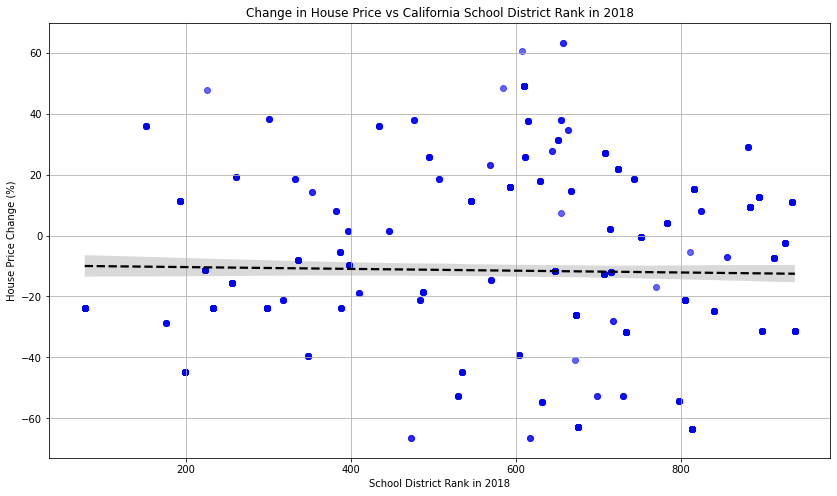

In [66]:
# SCATTERPLOT OF CHANGE IN HOUSE PRICE VS. SCHOOL DISTRICT RANK IN 2018

Q1_price_growth = highest_quintile_df['price_%change'].quantile(0.25)
Q3_price_growth = highest_quintile_df['price_%change'].quantile(0.75)
IQR_price_growth = Q3_price_growth - Q1_price_growth
lower_bound_price_growth = Q1_price_growth - 1.5 * IQR_price_growth
upper_bound_price_growth = Q3_price_growth + 1.5 * IQR_price_growth

filtered_highest_quintile_df = highest_quintile_df[
        (highest_quintile_df['price_%change'] >= lower_bound_price_growth) &
        (highest_quintile_df['price_%change'] <= upper_bound_price_growth)]

plt.figure(figsize=(14, 8))
sns.regplot(
    data=filtered_highest_quintile_df,
    x='rank_2018',
    y='price_%change',
    scatter_kws={'alpha': 0.6, 'color': 'blue'},
    line_kws={'linestyle': 'dashed', 'color': 'black'}
)

plt.title('Change in House Price vs California School District Rank in 2018')
plt.xlabel('School District Rank in 2018')
plt.ylabel('House Price Change (%)')
plt.grid(True)

plt.show()

Lower-ranked districts in 2018 were weakly associated with decreases in house prices, suggesting that perceived lower school quality may reduce house prices. This is consistent with expectations that higher-income households avoid lower-ranked districts to protect their net asset value. 

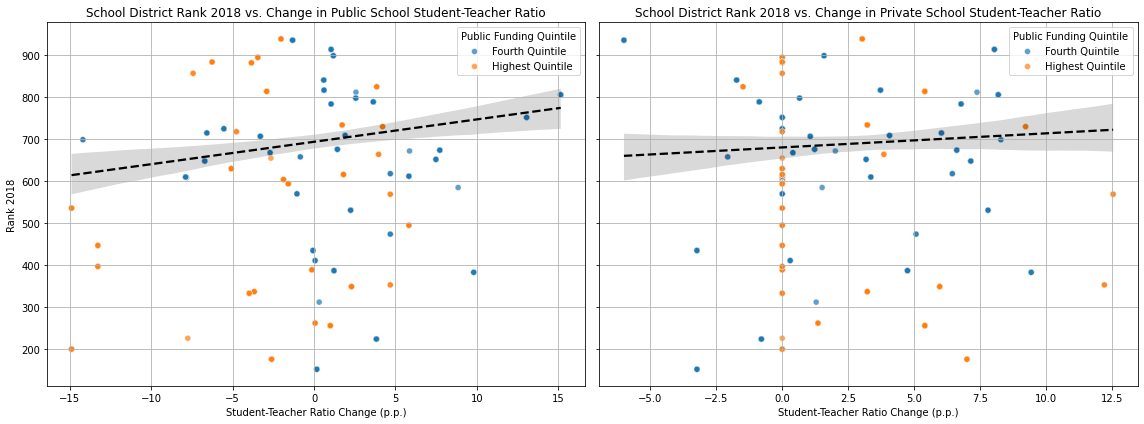

In [67]:
# SCATTERPLOT OF CHANGE IN SCHOOL DISTRICT RANK IN 2018 VS. CHANGE IN PUBLIC AND PRIVATE STUDENT-TO-TEACHER RATIO 

# Calculate IQRs and filter out outliers
Q1_price_growth = highest_quintile_df['rank_2018'].quantile(0.25)
Q3_price_growth = highest_quintile_df['rank_2018'].quantile(0.75)
IQR_price_growth = Q3_price_growth - Q1_price_growth
lower_bound_price_growth = Q1_price_growth - 1.5 * IQR_price_growth
upper_bound_price_growth = Q3_price_growth + 1.5 * IQR_price_growth

Q1_priv_st_ratio = highest_quintile_df['priv_st_ratio_change'].quantile(0.25)
Q3_priv_st_ratio = highest_quintile_df['priv_st_ratio_change'].quantile(0.75)
IQR_priv_st_ratio = Q3_priv_st_ratio - Q1_priv_st_ratio
lower_bound_priv_st_ratio = Q1_priv_st_ratio - 1.5 * IQR_priv_st_ratio
upper_bound_priv_st_ratio = Q3_priv_st_ratio + 1.5 * IQR_priv_st_ratio

Q1_pub_st_ratio = highest_quintile_df['pub_st_ratio_change'].quantile(0.25)
Q3_pub_st_ratio = highest_quintile_df['pub_st_ratio_change'].quantile(0.75)
IQR_pub_st_ratio = Q3_pub_st_ratio - Q1_pub_st_ratio
lower_bound_pub_st_ratio = Q1_pub_st_ratio - 1.5 * IQR_pub_st_ratio
upper_bound_pub_st_ratio = Q3_pub_st_ratio + 1.5 * IQR_pub_st_ratio

# Filter out outliers
merged_no_outliers_df = highest_quintile_df[
    (highest_quintile_df['rank_2018'] >= lower_bound_price_growth) &
    (highest_quintile_df['rank_2018'] <= upper_bound_price_growth) &
    (highest_quintile_df['priv_st_ratio_change'] >= lower_bound_priv_st_ratio) &
    (highest_quintile_df['priv_st_ratio_change'] <= upper_bound_priv_st_ratio) &
    (highest_quintile_df['pub_st_ratio_change'] >= lower_bound_pub_st_ratio) &
    (highest_quintile_df['pub_st_ratio_change'] <= upper_bound_pub_st_ratio)
]

# Aggregate to district level
aggregated_df = merged_no_outliers_df.groupby('district')[['priv_st_ratio_change', 'pub_st_ratio_change', 
                                                           'rank_2018']].mean().reset_index()
aggregated_df = aggregated_df.merge(merged_no_outliers_df[['expense_quintile', 'district']], on='district', 
                                    how='left')

aggregated_df = aggregated_df[aggregated_df['expense_quintile'] != 'Middle Quintile']

aggregated_df['expense_quintile'] = aggregated_df['expense_quintile'].cat.remove_unused_categories()

# Set up 2 side-by-side scatter plots with regression lines
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Left: Public schools
sns.scatterplot(data=aggregated_df, x='pub_st_ratio_change', y='rank_2018', hue='expense_quintile', ax=axes[0],
                                        alpha=0.7)

sns.regplot(data=aggregated_df, x='pub_st_ratio_change', y='rank_2018', scatter=False, ax=axes[0], color='black',
                                        line_kws={'linestyle': 'dashed'})
    
axes[0].set_title('School District Rank 2018 vs. Change in Public School Student-Teacher Ratio')
axes[0].set_xlabel('Student-Teacher Ratio Change (p.p.)')
axes[0].set_ylabel('Rank 2018')
axes[0].grid(True)

# Right: Private schools
sns.scatterplot(data=aggregated_df, x='priv_st_ratio_change', y='rank_2018', hue='expense_quintile', ax=axes[1],
                                        alpha=0.7)

sns.regplot(data=aggregated_df, x='priv_st_ratio_change', y='rank_2018', scatter=False, ax=axes[1], color='black',
                                        line_kws={'linestyle': 'dashed'})

axes[1].set_title('School District Rank 2018 vs. Change in Private School Student-Teacher Ratio')
axes[1].set_xlabel('Student-Teacher Ratio Change (p.p.)')
axes[1].set_ylabel('')  
axes[1].grid(True)

for ax in axes:
    ax.legend(title='Public Funding Quintile')

plt.tight_layout()
plt.savefig("webscraping_plot.png", dpi=300, bbox_inches='tight')
plt.show()

Fewer students per teacher, especially in public schools, correlate with better rankings, supporting the theory that smaller class sizes improve school quality and housing values. Furthermore, higher income individuals would more likely invest in property in these districts to potentially increase their net asset value. 

<span style="font-size:20px; font-weight:bold;">3.5 Regression Tree</span>

In [37]:
# Get all years back into highest_quintile_df
highest_quintile_df = merged_df[merged_df['quintile'] == 'Highest Quintile']

highest_quintile_df.loc[:, 'priv_avg_gr_%change'] = highest_quintile_df['priv_avg_gr_%change'].astype('float64')
highest_quintile_df.loc[:, 'pub_avg_gr_%change'] = highest_quintile_df['pub_avg_gr_%change'].astype('float64')

highest_quintile_df = highest_quintile_df.dropna(subset=['priv_st_ratio_change', 'pub_st_ratio_change', 
                                            'current_expense_per_ada_%change', 'inc_percent_change', 
                                            'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 
                                            'pub_avg_gr_%change', 'price_%change'])

highest_quintile_df['level'] = highest_quintile_df['level'].map({1.0: 'elementary', 2.0: 'middle', 3.0: 
                                                                 'high_school'})

dummies = pd.get_dummies(highest_quintile_df['level'], drop_first=False)
dummies = dummies.astype(int)
highest_quintile_df = pd.concat([highest_quintile_df, dummies], axis=1)

# Add interaction terms back in
highest_quintile_df['priv_st_highest_inc_qu'] = (
                highest_quintile_df['priv_st_ratio_change'] * highest_quintile_df['inc_percent_change'])
    
highest_quintile_df['priv_st_high'] = (
                highest_quintile_df['priv_st_ratio_change'] * highest_quintile_df['high_school'])

highest_quintile_df['pub_st_highest_inc_qu'] = (
                highest_quintile_df['pub_st_ratio_change'] * highest_quintile_df['inc_percent_change'])

highest_quintile_df['pub_st_high'] = (
                highest_quintile_df['pub_st_ratio_change'] * highest_quintile_df['high_school'])

highest_quintile_df['current_expense_highest_inc_qu'] = (
                highest_quintile_df['current_expense_per_ada_%change'] * highest_quintile_df['inc_percent_change'])

X_highest = highest_quintile_df.drop(['price', 'price_%change', 'avg_price', 'log_price', 'log_price_%change', 
                                      'district', 'level', 'quintile', 'price_change_quintile', 'expense_quintile', 
                                      'priv_count', 'priv_avg_gr_span', 'priv_st_ratio', 'priv_er', 'pub_count',
                                      'pub_avg_gr_span', 'pub_st_ratio', 'pub_er', 'current_expense_per_ada', 
                                      'inc_percent', 'zip'], axis=1).copy()

In [38]:
for col in list(X_highest):
    X_highest[col] = X_highest[col].astype(float)

In [40]:
from sklearn import tree
from sklearn import metrics

y = highest_quintile_df['log_price_%change']

# Regression tree for preferred x-variables
X_preferred = X_highest[['priv_st_ratio_change', 'pub_st_ratio_change', 'current_expense_per_ada_%change', 
      'inc_percent_change', 'priv_er_change', 'pub_er_change', 'priv_avg_gr_%change', 'pub_avg_gr_%change', 
      'priv_st_highest_inc_qu', 'pub_st_highest_inc_qu', 'current_expense_highest_inc_qu', 'priv_st_high', 
      'pub_st_high']]

In [41]:
# Replace inf/-inf with NaN
X_preferred = X_preferred.replace([np.inf, -np.inf], np.nan)

preferred_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X_preferred, y)

y_pred_preferred_tree = preferred_tree.predict(X_preferred)
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_preferred_tree))

Mean Squared Error: 0.19583008090014542


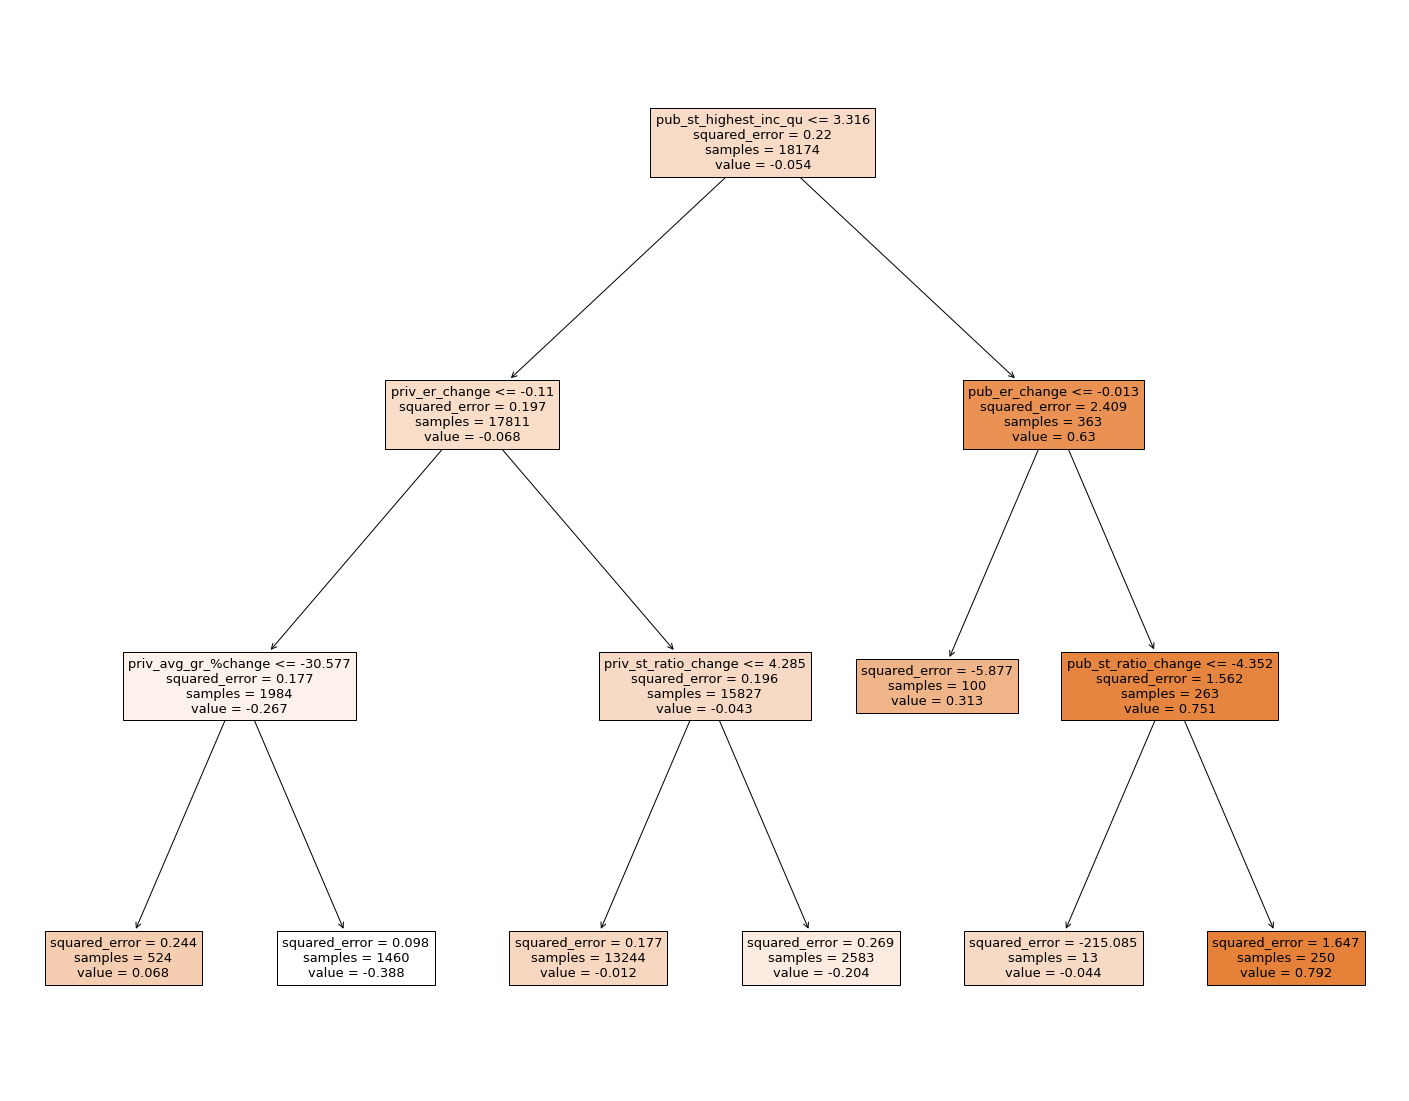

In [42]:
# REGRESSION TREE FOR PREFERRED SPECIFICATION

# Plot tree for preferred x-variables
preferred_fig = plt.figure(figsize=(25,20))
preferred_fig = tree.plot_tree(preferred_tree, feature_names=X_preferred.columns, filled=True)

The most important feature across regression trees was the combined effect of public school student-teacher ratio changes and income inequality among the top 20% of earners. For instance, districts with this interaction equal to or less than 3.316, a private school enrollment decrease greater than 0.11 percentage points, and a private school student-teacher ratio increase greater than 4.29 (four students per teacher) had an average predicted 0.2% decrease in house prices. The same conditions, except with a smaller class size increase, predicted a smaller 0.012% decrease.

Districts with the interaction greater than 3.316 and a public school enrollment decrease less than 0.013% had a predicted 0.31% increase in house prices. When the class size decreased by more than four students per teacher under the same conditions, the predicted increase in house price rose to 0.79%, the highest from the preferred tree.

Public and private school enrollment rates were the second most important features, followed by changes in public and private school student-teacher ratios and private school grade span. The regression tree's mean squared error (MSE) of 0.1958 implies an RMSE of 0.44 percentage points plus or minus error. Given that average house price change is 7.46%, with a range of -23.64% to 15.21%, this MSE suggests good predictive performance.

In [56]:
# REGRESSION FOR ALL X-VARIABLES

# Replace inf/-inf with NaN
X_highest = X_highest.replace([np.inf, -np.inf], np.nan)

# Regression tree for all x-variables
all_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X_highest,y)

y_pred_all_tree = all_tree.predict(X_highest)
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_all_tree))

Mean Squared Error: 0.18490402759097144


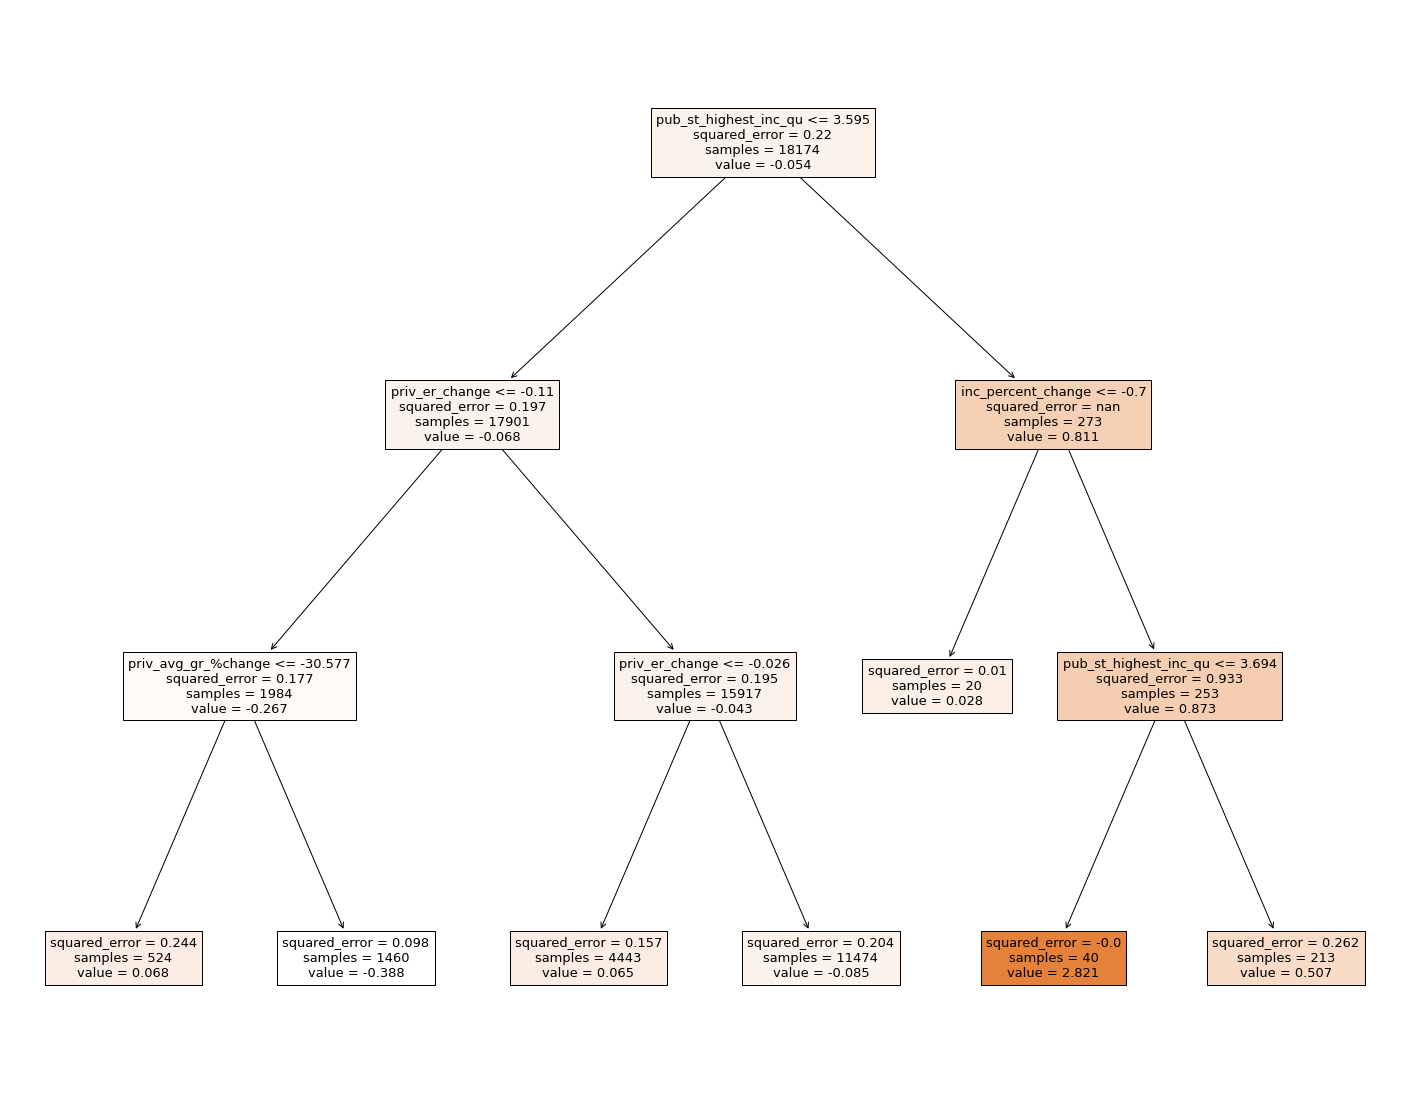

In [57]:
# Plot tree for all x-variables
all_fig = plt.figure(figsize=(25,20))
all_fig = tree.plot_tree(all_tree, feature_names=X_highest.columns, filled=True)

In the full feature regression tree, the same combined effect of public student-teacher ratio and income inequality remained most important, appearing in the branch twice predicting the highest house price increase of 2.82%. This repetition implies significant importance, or a complex, possibly nonlinear relationship. Private school enrollment rate also appeared twice, suggesting similar importance. Other key features included income inequality and private school grade span. The expanded model revealed more relevant features and complexity than the preferred tree.

In the full model, districts with the combined effect greater than 3.595, top income quintile share decline greater than 0.7%, and interaction less than 3.694 had the highest predicted increase in house prices of 2.82%. This exceeds the top predicted increase from the preferred tree by over 2 percentage points. The higher depth and feature set of the full model may have captured a niche pattern, although overfitting is a risk. However, with a regularization limit of three splits, the tree remains shallow enough to avoid overfitting and enhances interpretability.

The full tree’s MSE of 0.1849 (RMSE 0.43% plus or minus error) is slightly lower than the preferred tree’s, indicating modest accuracy gains from the additional features.

<span style="font-size:20px; font-weight:bold;">3.6 Random Forest</span>

In [146]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

X_preferred = X_preferred.dropna()
y = y[X_preferred.index]

# Initialize the Random Forest model
regr_RF = RandomForestRegressor(max_features=5, max_depth=5, random_state=1).fit(X_preferred, y)

# Predict the values
pred = regr_RF.predict(X_preferred)

# Calculate MSE
metrics.mean_squared_error(y, pred)

0.14637460826963813

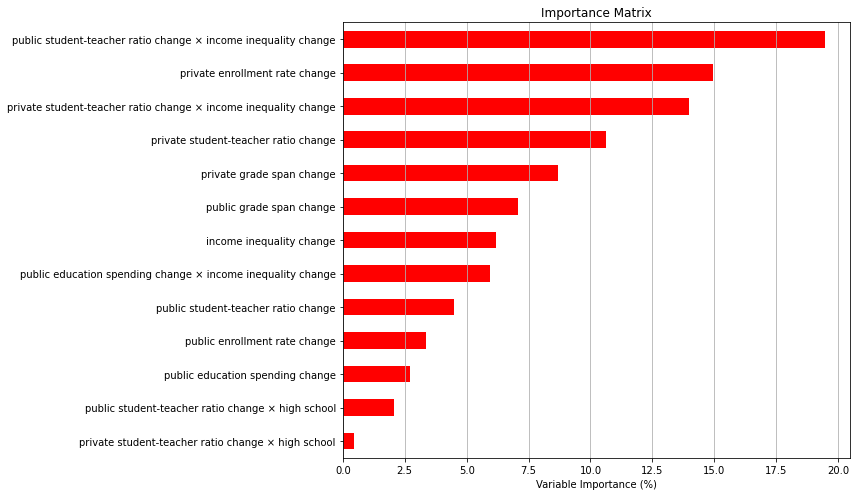

In [152]:
# IMPORTANCE MATRIX

clean_names = {
    'priv_st_ratio_change': 'private student-teacher ratio change',
    'pub_st_ratio_change': 'public student-teacher ratio change',
    'current_expense_per_ada_%change': 'public education spending change',
    'inc_percent_change': 'income inequality change',
    'priv_er_change': 'private enrollment rate change',
    'pub_er_change': 'public enrollment rate change',
    'priv_avg_gr_%change': 'private grade span change',
    'pub_avg_gr_%change': 'public grade span change',
    'priv_st_highest_inc_qu': 'private student-teacher ratio change × income inequality change',
    'pub_st_highest_inc_qu': 'public student-teacher ratio change × income inequality change',
    'current_expense_highest_inc_qu': 'public education spending change × income inequality change',
    'priv_st_high': 'private student-teacher ratio change × high school',
    'pub_st_high': 'public student-teacher ratio change × high school'
}

# Create the DataFrame
Importance = pd.DataFrame({'Importance': regr_RF.feature_importances_ * 100}, index=X_preferred.columns)

# Rename index 
Importance.index = Importance.index.map(lambda x: clean_names.get(x, x))

plt.figure(figsize=(12, 7))  
Importance.sort_values('Importance').plot(kind='barh', color='red', legend=False, ax=plt.gca())

plt.xlabel('Variable Importance (%)')
plt.title('Importance Matrix')
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()

The feature importance matrix reinforces these findings. The interaction of public student-teacher ratio and top quintile income inequality contributed 19.5% of the model’s predictive power. Private school enrollment change followed with 15%, and private school student-teacher ratio combined with top income share contributed 14%, even though it did not appear in the trees. In contrast, surprisingly public education spending only contributed 2.5%, suggesting it’s less relevant to house price changes.

<span style="font-size:20px; font-weight:bold;">3.7 OLS vs ML</span>

Private school grade span changes were more predictive in the regression trees than in OLS regressions. Districts with fewer private school grades may offer more specialized education, improving learning outcomes. The trees’ leftmost branches showed that these districts also had high declines in private enrollment, possibly due to exclusivity or prestige. These districts had a predicted house price increase of 0.068%, an insight OLS could not capture.

<span style="font-size:20px; font-weight:bold;">3.8 Conclusion</span>

This project analyzed how changes in public and private school quality measures affect house price changes across California districts (2010–2018), focusing on their capitalization into property values. The most important variable was the interaction between public school student-teacher ratio and top quintile income inequality. A rising income share for the top 20% appears to support larger class sizes while maintaining school quality, likely through increased public investment. High-income households may advocate for school funding not only to enhance education for their children but also to drive up local house prices, thereby boosting their own asset value. These individuals often hold policymaking roles and can influence education spending for personal (net asset value) and community gain.

Future research should gather more complete house price data and control for additional variables like crime, population, and local policies (e.g., property taxes) at the district level. This would allow a more accurate and comprehensive analysis of how school quality investments translate into rising property values, especially for the highest income earners as a means to increase their net asset value.

<span style="font-size:20px; font-weight:bold;">References</span>

1. Oates, W. E. (1969). The Effects of Property Taxes and Local Public Spending on Property Values: An Empirical Study of Tax Capitalization and the Tiebout Hypothesis. Journal of Political Economy, 77(6), 957–971. http://www.jstor.org/stable/1837209

2. Rosen, H. S., & Fullerton, D. J. (1977). A Note on Local Tax Rates, Public Benefit Levels, and Property Values. Journal of Political Economy, 85(2), 433–440. http://www.jstor.org/stable/1830804

3. Downes, T., & Zabel, J. (2002). The impact of school characteristics on house prices: Chicago 1987–1991. jOURNAL OF urban Economics, 52(1), 1-25. https://doi.org/10.1016/S0094-1190(02)00010-4

4. Gibbons, Steve & Machin, Stephen, 2003. "Valuing English primary schools," Journal of Urban Economics, Elsevier, vol. 53(2), pages 197-219. https://doi.org/10.1016/S0094-1190(02)00516-8

5. Figlio, D. N., & Lucas, M. E. (2004). What’s in a Grade? School Report Cards and the Housing Market. The American Economic Review, 94(3), 591–604. http://www.jstor.org/stable/3592944

6. Bayer, P., Ferreira, F., & McMillan, R. (2007). A Unified Framework for Measuring Preferences for Schools and Neighborhoods. Journal of Political Economy, 115(4), 588–638. https://doi.org/10.1086/522381

7. Jud, G. D., & Watts, J. M. (1981). Schools and Housing Values. Land Economics, 57(3), 459–470. https://doi.org/10.2307/3146025

8. Black, S. E. (1999). Do Better Schools Matter? Parental Valuation of Elementary Education. The Quarterly Journal of Economics, 114(2), 577–599. http://www.jstor.org/stable/2587017

9. Kane, T. J., Riegg, S. K., & Staiger, D. O. (2006). School Quality, Neighborhoods, and Housing Prices. American Law and Economics Review, 8(2), 183–212. http://www.jstor.org/stable/42705497

10. Brasington, D. M. (1999). Which Measures of School Quality Does the Housing Market Value? The Journal of Real Estate Research, 18(3), 395–413. http://www.jstor.org/stable/24887199

11. David Brasington & Donald R. Haurin, 2006. "Educational Outcomes and House Values: A Test of the value added Approach," Journal of Regional Science, Wiley Blackwell, vol. 46(2), pages 245-268. https://doi.org/10.1111/j.0022-4146.2006.00440.x

12. Andrew, M. V. D. (2021). US Schools Dataset [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/andrewmvd/us-schools-dataset?select=Public_Schools.csv

13. Sakib, A. S. (2021). USA Real Estate Dataset [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

14. California Department of Education. (n.d.). Current expense of education. https://www.cde.ca.gov/ds/fd/ec/currentexpense.asp

15. California Department of Education. (n.d.). Public schools and districts data files. https://www.cde.ca.gov/ds/si/ds/pubschls.asp

16. Population Reference Bureau. (n.d.). Household income distribution, by quintile (regions of 10,000 residents or more). Kidsdata.org. https://www.kidsdata.org/topic/2170/income-quintile-10k/table

17. National Center for Education Statistics. (n.d.). School district characteristics 2017–18. https://data-nces.opendata.arcgis.com/datasets/nces::school-district-characteristics-2017-18/about

18. Moorlach, J. (2021, May 20). 2019 California’s 940 school districts rankings. California Policy Center. https://californiapolicycenter.org/2019-californias-940-school-districts-rankings/

19. SchoolDigger. (2011). California school district rankings 2011. https://www.schooldigger.com/go/CA/districtrank.aspx?y=2011

20. Niche. (n.d.). 2025 best private schools in California. https://www.niche.com/k12/search/best-private-schools/s/california/

21. Education Data Partnership. (n.d.). District comparisons. Ed-Data. https://www.ed-data.org/Comparisons?compType=districts

22. Private School Review. (n.d.). California private schools by tuition cost (2025). https://www.privateschoolreview.com/tuition-stats/california